# Advanced Machine Learning - Assignment 1

In [1]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
from itertools import product

### Generate synthetic data

In [19]:
np.random.seed(10)
N = 201 # number of samples
eps_mu = 0
eps_sigma = 0.2
w_1 = 0.5
w_0 = -1.5

X_tot = np.linspace(-1.0,1.0, num=N)
eps = np.random.normal(eps_mu, eps_sigma, N)
T_tot = w_1*X_tot + w_0 + eps

### Question 9

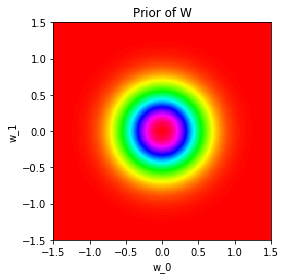

In [20]:
#1. Setting prior distribution over W = [w_0, w_1] and visualize it
# Assuming p(w) = N(prior_mu, prior_sigma^2I).

pixels = 200
prior_mu = [0, 0]
prior_sigma = 0.5
prior_cov_mat = [[prior_sigma**2, 0],[0, prior_sigma**2]] # spherical covariance matrix

w_0_range = np.linspace(-2.0, 2.0, num=pixels)
w_1_range = np.linspace(-2.0, 2.0, num=pixels)

X, Y = np.meshgrid(w_0_range, w_1_range)
N, M = len(X), len(Y)
Z = np.zeros((N, M))
for i,(x,y) in enumerate(product(w_0_range,w_1_range)):
    pos = np.hstack((x, y))
    Z[np.unravel_index(i, (N,M))] =  multivariate_normal(prior_mu, prior_cov_mat).pdf(pos)
im = plt.imshow(Z,cmap='hsv',extent=(-1.5, 1.5, -1.5, 1.5))
ax = plt.gca()
ax.grid(False)
plt.title("Prior of W")
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.show()

In [ ]:
#OLD
prior_w_0, prior_w_1 = np.random.multivariate_normal(prior_mu ,prior_cov_mat, N).T;

plt.figure(figsize=(11, 11))
plt.plot(prior_w_0, prior_w_1, 'x',label = "Prior Sample")

plt.legend(loc="upper right")
plt.title("Samples from Gaussian prior")
plt.ylabel('w_1')
plt.xlabel('w_0')
plt.show()

(array([ 4.,  7., 15., 20., 39., 37., 26., 16., 25.,  7.,  4.,  1.]),
 array([-2.60880268, -2.1458109 , -1.68281911, -1.21982733, -0.75683555,
        -0.29384377,  0.16914801,  0.6321398 ,  1.09513158,  1.55812336,
         2.02111514,  2.48410692,  2.94709871]),
 <a list of 12 Patch objects>)

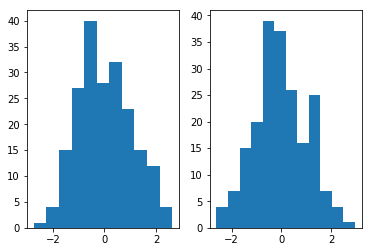

<Figure size 1440x720 with 0 Axes>

In [160]:
#OLD
# Histogram of prior
fig, axs = plt.subplots(1, 2, sharey=True)
plt.figure(figsize=(20, 10))

axs[0].hist(prior_w_0, bins='auto')
axs[1].hist(prior_w_1, bins='auto')

-2.0
-2.0
-2.0
-1.979899497487437
-2.0
-1.9597989949748744
-2.0
-1.9396984924623115
-2.0
-1.9195979899497488
-2.0
-1.899497487437186
-2.0
-1.879396984924623
-2.0
-1.8592964824120604
-2.0
-1.8391959798994975
-2.0
-1.8190954773869348
-2.0
-1.7989949748743719
-2.0
-1.778894472361809
-2.0
-1.7587939698492463
-2.0
-1.7386934673366834
-2.0
-1.7185929648241207
-2.0
-1.6984924623115578
-2.0
-1.678391959798995
-2.0
-1.6582914572864322
-2.0
-1.6381909547738693
-2.0
-1.6180904522613067
-2.0
-1.5979899497487438
-2.0
-1.5778894472361809
-2.0
-1.557788944723618
-2.0
-1.5376884422110553
-2.0
-1.5175879396984926
-2.0
-1.4974874371859297
-2.0
-1.4773869346733668
-2.0
-1.457286432160804
-2.0
-1.4371859296482412
-2.0
-1.4170854271356785
-2.0
-1.3969849246231156
-2.0
-1.3768844221105527
-2.0
-1.3567839195979898
-2.0
-1.3366834170854272
-2.0
-1.3165829145728645
-2.0
-1.2964824120603016
-2.0
-1.2763819095477387
-2.0
-1.2562814070351758
-2.0
-1.236180904522613
-2.0
-1.2160804020100502
-2.0
-1.195979899497487

-1.9597989949748744
-1.3969849246231156
-1.9597989949748744
-1.3768844221105527
-1.9597989949748744
-1.3567839195979898
-1.9597989949748744
-1.3366834170854272
-1.9597989949748744
-1.3165829145728645
-1.9597989949748744
-1.2964824120603016
-1.9597989949748744
-1.2763819095477387
-1.9597989949748744
-1.2562814070351758
-1.9597989949748744
-1.236180904522613
-1.9597989949748744
-1.2160804020100502
-1.9597989949748744
-1.1959798994974875
-1.9597989949748744
-1.1758793969849246
-1.9597989949748744
-1.1557788944723617
-1.9597989949748744
-1.135678391959799
-1.9597989949748744
-1.1155778894472361
-1.9597989949748744
-1.0954773869346734
-1.9597989949748744
-1.0753768844221105
-1.9597989949748744
-1.0552763819095476
-1.9597989949748744
-1.035175879396985
-1.9597989949748744
-1.015075376884422
-1.9597989949748744
-0.9949748743718594
-1.9597989949748744
-0.9748743718592965
-1.9597989949748744
-0.9547738693467336
-1.9597989949748744
-0.9346733668341709
-1.9597989949748744
-0.914572864321608
-1.95

-1.9396984924623115
1.3165829145728645
-1.9396984924623115
1.3366834170854274
-1.9396984924623115
1.3567839195979898
-1.9396984924623115
1.3768844221105527
-1.9396984924623115
1.3969849246231156
-1.9396984924623115
1.4170854271356785
-1.9396984924623115
1.4371859296482414
-1.9396984924623115
1.457286432160804
-1.9396984924623115
1.4773869346733668
-1.9396984924623115
1.4974874371859297
-1.9396984924623115
1.5175879396984926
-1.9396984924623115
1.5376884422110555
-1.9396984924623115
1.557788944723618
-1.9396984924623115
1.5778894472361809
-1.9396984924623115
1.5979899497487438
-1.9396984924623115
1.6180904522613067
-1.9396984924623115
1.6381909547738696
-1.9396984924623115
1.658291457286432
-1.9396984924623115
1.678391959798995
-1.9396984924623115
1.6984924623115578
-1.9396984924623115
1.7185929648241207
-1.9396984924623115
1.7386934673366836
-1.9396984924623115
1.758793969849246
-1.9396984924623115
1.778894472361809
-1.9396984924623115
1.7989949748743719
-1.9396984924623115
1.819095477

-1.899497487437186
-0.03015075376884413
-1.899497487437186
-0.01005025125628145
-1.899497487437186
0.010050251256281229
-1.899497487437186
0.03015075376884413
-1.899497487437186
0.05025125628140703
-1.899497487437186
0.07035175879396993
-1.899497487437186
0.09045226130653283
-1.899497487437186
0.11055276381909529
-1.899497487437186
0.1306532663316582
-1.899497487437186
0.1507537688442211
-1.899497487437186
0.170854271356784
-1.899497487437186
0.1909547738693469
-1.899497487437186
0.2110552763819098
-1.899497487437186
0.23115577889447225
-1.899497487437186
0.25125628140703515
-1.899497487437186
0.27135678391959805
-1.899497487437186
0.29145728643216096
-1.899497487437186
0.31155778894472386
-1.899497487437186
0.3316582914572863
-1.899497487437186
0.3517587939698492
-1.899497487437186
0.3718592964824121
-1.899497487437186
0.391959798994975
-1.899497487437186
0.4120603015075379
-1.899497487437186
0.4321608040201004
-1.899497487437186
0.4522613065326633
-1.899497487437186
0.472361809045226

-1.8592964824120604
-1.5979899497487438
-1.8592964824120604
-1.5778894472361809
-1.8592964824120604
-1.557788944723618
-1.8592964824120604
-1.5376884422110553
-1.8592964824120604
-1.5175879396984926
-1.8592964824120604
-1.4974874371859297
-1.8592964824120604
-1.4773869346733668
-1.8592964824120604
-1.457286432160804
-1.8592964824120604
-1.4371859296482412
-1.8592964824120604
-1.4170854271356785
-1.8592964824120604
-1.3969849246231156
-1.8592964824120604
-1.3768844221105527
-1.8592964824120604
-1.3567839195979898
-1.8592964824120604
-1.3366834170854272
-1.8592964824120604
-1.3165829145728645
-1.8592964824120604
-1.2964824120603016
-1.8592964824120604
-1.2763819095477387
-1.8592964824120604
-1.2562814070351758
-1.8592964824120604
-1.236180904522613
-1.8592964824120604
-1.2160804020100502
-1.8592964824120604
-1.1959798994974875
-1.8592964824120604
-1.1758793969849246
-1.8592964824120604
-1.1557788944723617
-1.8592964824120604
-1.135678391959799
-1.8592964824120604
-1.1155778894472361
-1.8

-1.8391959798994975
-0.01005025125628145
-1.8391959798994975
0.010050251256281229
-1.8391959798994975
0.03015075376884413
-1.8391959798994975
0.05025125628140703
-1.8391959798994975
0.07035175879396993
-1.8391959798994975
0.09045226130653283
-1.8391959798994975
0.11055276381909529
-1.8391959798994975
0.1306532663316582
-1.8391959798994975
0.1507537688442211
-1.8391959798994975
0.170854271356784
-1.8391959798994975
0.1909547738693469
-1.8391959798994975
0.2110552763819098
-1.8391959798994975
0.23115577889447225
-1.8391959798994975
0.25125628140703515
-1.8391959798994975
0.27135678391959805
-1.8391959798994975
0.29145728643216096
-1.8391959798994975
0.31155778894472386
-1.8391959798994975
0.3316582914572863
-1.8391959798994975
0.3517587939698492
-1.8391959798994975
0.3718592964824121
-1.8391959798994975
0.391959798994975
-1.8391959798994975
0.4120603015075379
-1.8391959798994975
0.4321608040201004
-1.8391959798994975
0.4522613065326633
-1.8391959798994975
0.4723618090452262
-1.8391959798

-1.8190954773869348
1.9597989949748746
-1.8190954773869348
1.979899497487437
-1.8190954773869348
2.0
-1.7989949748743719
-2.0
-1.7989949748743719
-1.979899497487437
-1.7989949748743719
-1.9597989949748744
-1.7989949748743719
-1.9396984924623115
-1.7989949748743719
-1.9195979899497488
-1.7989949748743719
-1.899497487437186
-1.7989949748743719
-1.879396984924623
-1.7989949748743719
-1.8592964824120604
-1.7989949748743719
-1.8391959798994975
-1.7989949748743719
-1.8190954773869348
-1.7989949748743719
-1.7989949748743719
-1.7989949748743719
-1.778894472361809
-1.7989949748743719
-1.7587939698492463
-1.7989949748743719
-1.7386934673366834
-1.7989949748743719
-1.7185929648241207
-1.7989949748743719
-1.6984924623115578
-1.7989949748743719
-1.678391959798995
-1.7989949748743719
-1.6582914572864322
-1.7989949748743719
-1.6381909547738693
-1.7989949748743719
-1.6180904522613067
-1.7989949748743719
-1.5979899497487438
-1.7989949748743719
-1.5778894472361809
-1.7989949748743719
-1.557788944723618


-1.778894472361809
-0.1306532663316582
-1.778894472361809
-0.11055276381909551
-1.778894472361809
-0.09045226130653261
-1.778894472361809
-0.07035175879396993
-1.778894472361809
-0.05025125628140703
-1.778894472361809
-0.03015075376884413
-1.778894472361809
-0.01005025125628145
-1.778894472361809
0.010050251256281229
-1.778894472361809
0.03015075376884413
-1.778894472361809
0.05025125628140703
-1.778894472361809
0.07035175879396993
-1.778894472361809
0.09045226130653283
-1.778894472361809
0.11055276381909529
-1.778894472361809
0.1306532663316582
-1.778894472361809
0.1507537688442211
-1.778894472361809
0.170854271356784
-1.778894472361809
0.1909547738693469
-1.778894472361809
0.2110552763819098
-1.778894472361809
0.23115577889447225
-1.778894472361809
0.25125628140703515
-1.778894472361809
0.27135678391959805
-1.778894472361809
0.29145728643216096
-1.778894472361809
0.31155778894472386
-1.778894472361809
0.3316582914572863
-1.778894472361809
0.3517587939698492
-1.778894472361809
0.37185

-1.7587939698492463
1.4371859296482414
-1.7587939698492463
1.457286432160804
-1.7587939698492463
1.4773869346733668
-1.7587939698492463
1.4974874371859297
-1.7587939698492463
1.5175879396984926
-1.7587939698492463
1.5376884422110555
-1.7587939698492463
1.557788944723618
-1.7587939698492463
1.5778894472361809
-1.7587939698492463
1.5979899497487438
-1.7587939698492463
1.6180904522613067
-1.7587939698492463
1.6381909547738696
-1.7587939698492463
1.658291457286432
-1.7587939698492463
1.678391959798995
-1.7587939698492463
1.6984924623115578
-1.7587939698492463
1.7185929648241207
-1.7587939698492463
1.7386934673366836
-1.7587939698492463
1.758793969849246
-1.7587939698492463
1.778894472361809
-1.7587939698492463
1.7989949748743719
-1.7587939698492463
1.8190954773869348
-1.7587939698492463
1.8391959798994977
-1.7587939698492463
1.8592964824120601
-1.7587939698492463
1.879396984924623
-1.7587939698492463
1.899497487437186
-1.7587939698492463
1.9195979899497488
-1.7587939698492463
1.93969849246

-1.7185929648241207
-1.2562814070351758
-1.7185929648241207
-1.236180904522613
-1.7185929648241207
-1.2160804020100502
-1.7185929648241207
-1.1959798994974875
-1.7185929648241207
-1.1758793969849246
-1.7185929648241207
-1.1557788944723617
-1.7185929648241207
-1.135678391959799
-1.7185929648241207
-1.1155778894472361
-1.7185929648241207
-1.0954773869346734
-1.7185929648241207
-1.0753768844221105
-1.7185929648241207
-1.0552763819095476
-1.7185929648241207
-1.035175879396985
-1.7185929648241207
-1.015075376884422
-1.7185929648241207
-0.9949748743718594
-1.7185929648241207
-0.9748743718592965
-1.7185929648241207
-0.9547738693467336
-1.7185929648241207
-0.9346733668341709
-1.7185929648241207
-0.914572864321608
-1.7185929648241207
-0.8944723618090451
-1.7185929648241207
-0.8743718592964824
-1.7185929648241207
-0.8542713567839195
-1.7185929648241207
-0.8341708542713568
-1.7185929648241207
-0.8140703517587939
-1.7185929648241207
-0.793969849246231
-1.7185929648241207
-0.7738693467336684
-1.718

-1.6984924623115578
0.512562814070352
-1.6984924623115578
0.5326633165829144
-1.6984924623115578
0.5527638190954773
-1.6984924623115578
0.5728643216080402
-1.6984924623115578
0.5929648241206031
-1.6984924623115578
0.613065326633166
-1.6984924623115578
0.6331658291457285
-1.6984924623115578
0.6532663316582914
-1.6984924623115578
0.6733668341708543
-1.6984924623115578
0.6934673366834172
-1.6984924623115578
0.7135678391959801
-1.6984924623115578
0.7336683417085426
-1.6984924623115578
0.7537688442211055
-1.6984924623115578
0.7738693467336684
-1.6984924623115578
0.7939698492462313
-1.6984924623115578
0.8140703517587942
-1.6984924623115578
0.8341708542713566
-1.6984924623115578
0.8542713567839195
-1.6984924623115578
0.8743718592964824
-1.6984924623115578
0.8944723618090453
-1.6984924623115578
0.9145728643216082
-1.6984924623115578
0.9346733668341707
-1.6984924623115578
0.9547738693467336
-1.6984924623115578
0.9748743718592965
-1.6984924623115578
0.9949748743718594
-1.6984924623115578
1.01507

-1.6582914572864322
-1.2763819095477387
-1.6582914572864322
-1.2562814070351758
-1.6582914572864322
-1.236180904522613
-1.6582914572864322
-1.2160804020100502
-1.6582914572864322
-1.1959798994974875
-1.6582914572864322
-1.1758793969849246
-1.6582914572864322
-1.1557788944723617
-1.6582914572864322
-1.135678391959799
-1.6582914572864322
-1.1155778894472361
-1.6582914572864322
-1.0954773869346734
-1.6582914572864322
-1.0753768844221105
-1.6582914572864322
-1.0552763819095476
-1.6582914572864322
-1.035175879396985
-1.6582914572864322
-1.015075376884422
-1.6582914572864322
-0.9949748743718594
-1.6582914572864322
-0.9748743718592965
-1.6582914572864322
-0.9547738693467336
-1.6582914572864322
-0.9346733668341709
-1.6582914572864322
-0.914572864321608
-1.6582914572864322
-0.8944723618090451
-1.6582914572864322
-0.8743718592964824
-1.6582914572864322
-0.8542713567839195
-1.6582914572864322
-0.8341708542713568
-1.6582914572864322
-0.8140703517587939
-1.6582914572864322
-0.793969849246231
-1.658

-1.6381909547738693
-0.5728643216080402
-1.6381909547738693
-0.5527638190954773
-1.6381909547738693
-0.5326633165829147
-1.6381909547738693
-0.5125628140703518
-1.6381909547738693
-0.49246231155778886
-1.6381909547738693
-0.4723618090452262
-1.6381909547738693
-0.4522613065326633
-1.6381909547738693
-0.4321608040201004
-1.6381909547738693
-0.4120603015075377
-1.6381909547738693
-0.3919597989949748
-1.6381909547738693
-0.3718592964824121
-1.6381909547738693
-0.3517587939698492
-1.6381909547738693
-0.3316582914572863
-1.6381909547738693
-0.31155778894472363
-1.6381909547738693
-0.29145728643216073
-1.6381909547738693
-0.27135678391959805
-1.6381909547738693
-0.25125628140703515
-1.6381909547738693
-0.23115577889447225
-1.6381909547738693
-0.21105527638190957
-1.6381909547738693
-0.19095477386934667
-1.6381909547738693
-0.170854271356784
-1.6381909547738693
-0.1507537688442211
-1.6381909547738693
-0.1306532663316582
-1.6381909547738693
-0.11055276381909551
-1.6381909547738693
-0.090452261

-1.6180904522613067
-0.29145728643216073
-1.6180904522613067
-0.27135678391959805
-1.6180904522613067
-0.25125628140703515
-1.6180904522613067
-0.23115577889447225
-1.6180904522613067
-0.21105527638190957
-1.6180904522613067
-0.19095477386934667
-1.6180904522613067
-0.170854271356784
-1.6180904522613067
-0.1507537688442211
-1.6180904522613067
-0.1306532663316582
-1.6180904522613067
-0.11055276381909551
-1.6180904522613067
-0.09045226130653261
-1.6180904522613067
-0.07035175879396993
-1.6180904522613067
-0.05025125628140703
-1.6180904522613067
-0.03015075376884413
-1.6180904522613067
-0.01005025125628145
-1.6180904522613067
0.010050251256281229
-1.6180904522613067
0.03015075376884413
-1.6180904522613067
0.05025125628140703
-1.6180904522613067
0.07035175879396993
-1.6180904522613067
0.09045226130653283
-1.6180904522613067
0.11055276381909529
-1.6180904522613067
0.1306532663316582
-1.6180904522613067
0.1507537688442211
-1.6180904522613067
0.170854271356784
-1.6180904522613067
0.1909547738

-1.5979899497487438
0.8743718592964824
-1.5979899497487438
0.8944723618090453
-1.5979899497487438
0.9145728643216082
-1.5979899497487438
0.9346733668341707
-1.5979899497487438
0.9547738693467336
-1.5979899497487438
0.9748743718592965
-1.5979899497487438
0.9949748743718594
-1.5979899497487438
1.0150753768844223
-1.5979899497487438
1.0351758793969852
-1.5979899497487438
1.0552763819095476
-1.5979899497487438
1.0753768844221105
-1.5979899497487438
1.0954773869346734
-1.5979899497487438
1.1155778894472363
-1.5979899497487438
1.1356783919597992
-1.5979899497487438
1.1557788944723617
-1.5979899497487438
1.1758793969849246
-1.5979899497487438
1.1959798994974875
-1.5979899497487438
1.2160804020100504
-1.5979899497487438
1.2361809045226133
-1.5979899497487438
1.2562814070351758
-1.5979899497487438
1.2763819095477387
-1.5979899497487438
1.2964824120603016
-1.5979899497487438
1.3165829145728645
-1.5979899497487438
1.3366834170854274
-1.5979899497487438
1.3567839195979898
-1.5979899497487438
1.376

-1.5778894472361809
1.9195979899497488
-1.5778894472361809
1.9396984924623117
-1.5778894472361809
1.9597989949748746
-1.5778894472361809
1.979899497487437
-1.5778894472361809
2.0
-1.557788944723618
-2.0
-1.557788944723618
-1.979899497487437
-1.557788944723618
-1.9597989949748744
-1.557788944723618
-1.9396984924623115
-1.557788944723618
-1.9195979899497488
-1.557788944723618
-1.899497487437186
-1.557788944723618
-1.879396984924623
-1.557788944723618
-1.8592964824120604
-1.557788944723618
-1.8391959798994975
-1.557788944723618
-1.8190954773869348
-1.557788944723618
-1.7989949748743719
-1.557788944723618
-1.778894472361809
-1.557788944723618
-1.7587939698492463
-1.557788944723618
-1.7386934673366834
-1.557788944723618
-1.7185929648241207
-1.557788944723618
-1.6984924623115578
-1.557788944723618
-1.678391959798995
-1.557788944723618
-1.6582914572864322
-1.557788944723618
-1.6381909547738693
-1.557788944723618
-1.6180904522613067
-1.557788944723618
-1.5979899497487438
-1.557788944723618
-1.

-1.5376884422110553
-1.3567839195979898
-1.5376884422110553
-1.3366834170854272
-1.5376884422110553
-1.3165829145728645
-1.5376884422110553
-1.2964824120603016
-1.5376884422110553
-1.2763819095477387
-1.5376884422110553
-1.2562814070351758
-1.5376884422110553
-1.236180904522613
-1.5376884422110553
-1.2160804020100502
-1.5376884422110553
-1.1959798994974875
-1.5376884422110553
-1.1758793969849246
-1.5376884422110553
-1.1557788944723617
-1.5376884422110553
-1.135678391959799
-1.5376884422110553
-1.1155778894472361
-1.5376884422110553
-1.0954773869346734
-1.5376884422110553
-1.0753768844221105
-1.5376884422110553
-1.0552763819095476
-1.5376884422110553
-1.035175879396985
-1.5376884422110553
-1.015075376884422
-1.5376884422110553
-0.9949748743718594
-1.5376884422110553
-0.9748743718592965
-1.5376884422110553
-0.9547738693467336
-1.5376884422110553
-0.9346733668341709
-1.5376884422110553
-0.914572864321608
-1.5376884422110553
-0.8944723618090451
-1.5376884422110553
-0.8743718592964824
-1.53

-1.5175879396984926
0.27135678391959805
-1.5175879396984926
0.29145728643216096
-1.5175879396984926
0.31155778894472386
-1.5175879396984926
0.3316582914572863
-1.5175879396984926
0.3517587939698492
-1.5175879396984926
0.3718592964824121
-1.5175879396984926
0.391959798994975
-1.5175879396984926
0.4120603015075379
-1.5175879396984926
0.4321608040201004
-1.5175879396984926
0.4522613065326633
-1.5175879396984926
0.4723618090452262
-1.5175879396984926
0.4924623115577891
-1.5175879396984926
0.512562814070352
-1.5175879396984926
0.5326633165829144
-1.5175879396984926
0.5527638190954773
-1.5175879396984926
0.5728643216080402
-1.5175879396984926
0.5929648241206031
-1.5175879396984926
0.613065326633166
-1.5175879396984926
0.6331658291457285
-1.5175879396984926
0.6532663316582914
-1.5175879396984926
0.6733668341708543
-1.5175879396984926
0.6934673366834172
-1.5175879396984926
0.7135678391959801
-1.5175879396984926
0.7336683417085426
-1.5175879396984926
0.7537688442211055
-1.5175879396984926
0.773

-1.4974874371859297
0.6331658291457285
-1.4974874371859297
0.6532663316582914
-1.4974874371859297
0.6733668341708543
-1.4974874371859297
0.6934673366834172
-1.4974874371859297
0.7135678391959801
-1.4974874371859297
0.7336683417085426
-1.4974874371859297
0.7537688442211055
-1.4974874371859297
0.7738693467336684
-1.4974874371859297
0.7939698492462313
-1.4974874371859297
0.8140703517587942
-1.4974874371859297
0.8341708542713566
-1.4974874371859297
0.8542713567839195
-1.4974874371859297
0.8743718592964824
-1.4974874371859297
0.8944723618090453
-1.4974874371859297
0.9145728643216082
-1.4974874371859297
0.9346733668341707
-1.4974874371859297
0.9547738693467336
-1.4974874371859297
0.9748743718592965
-1.4974874371859297
0.9949748743718594
-1.4974874371859297
1.0150753768844223
-1.4974874371859297
1.0351758793969852
-1.4974874371859297
1.0552763819095476
-1.4974874371859297
1.0753768844221105
-1.4974874371859297
1.0954773869346734
-1.4974874371859297
1.1155778894472363
-1.4974874371859297
1.135

-1.4773869346733668
1.658291457286432
-1.4773869346733668
1.678391959798995
-1.4773869346733668
1.6984924623115578
-1.4773869346733668
1.7185929648241207
-1.4773869346733668
1.7386934673366836
-1.4773869346733668
1.758793969849246
-1.4773869346733668
1.778894472361809
-1.4773869346733668
1.7989949748743719
-1.4773869346733668
1.8190954773869348
-1.4773869346733668
1.8391959798994977
-1.4773869346733668
1.8592964824120601
-1.4773869346733668
1.879396984924623
-1.4773869346733668
1.899497487437186
-1.4773869346733668
1.9195979899497488
-1.4773869346733668
1.9396984924623117
-1.4773869346733668
1.9597989949748746
-1.4773869346733668
1.979899497487437
-1.4773869346733668
2.0
-1.457286432160804
-2.0
-1.457286432160804
-1.979899497487437
-1.457286432160804
-1.9597989949748744
-1.457286432160804
-1.9396984924623115
-1.457286432160804
-1.9195979899497488
-1.457286432160804
-1.899497487437186
-1.457286432160804
-1.879396984924623
-1.457286432160804
-1.8592964824120604
-1.457286432160804
-1.8391

-1.4371859296482412
-0.11055276381909551
-1.4371859296482412
-0.09045226130653261
-1.4371859296482412
-0.07035175879396993
-1.4371859296482412
-0.05025125628140703
-1.4371859296482412
-0.03015075376884413
-1.4371859296482412
-0.01005025125628145
-1.4371859296482412
0.010050251256281229
-1.4371859296482412
0.03015075376884413
-1.4371859296482412
0.05025125628140703
-1.4371859296482412
0.07035175879396993
-1.4371859296482412
0.09045226130653283
-1.4371859296482412
0.11055276381909529
-1.4371859296482412
0.1306532663316582
-1.4371859296482412
0.1507537688442211
-1.4371859296482412
0.170854271356784
-1.4371859296482412
0.1909547738693469
-1.4371859296482412
0.2110552763819098
-1.4371859296482412
0.23115577889447225
-1.4371859296482412
0.25125628140703515
-1.4371859296482412
0.27135678391959805
-1.4371859296482412
0.29145728643216096
-1.4371859296482412
0.31155778894472386
-1.4371859296482412
0.3316582914572863
-1.4371859296482412
0.3517587939698492
-1.4371859296482412
0.3718592964824121
-1

-1.4170854271356785
1.979899497487437
-1.4170854271356785
2.0
-1.3969849246231156
-2.0
-1.3969849246231156
-1.979899497487437
-1.3969849246231156
-1.9597989949748744
-1.3969849246231156
-1.9396984924623115
-1.3969849246231156
-1.9195979899497488
-1.3969849246231156
-1.899497487437186
-1.3969849246231156
-1.879396984924623
-1.3969849246231156
-1.8592964824120604
-1.3969849246231156
-1.8391959798994975
-1.3969849246231156
-1.8190954773869348
-1.3969849246231156
-1.7989949748743719
-1.3969849246231156
-1.778894472361809
-1.3969849246231156
-1.7587939698492463
-1.3969849246231156
-1.7386934673366834
-1.3969849246231156
-1.7185929648241207
-1.3969849246231156
-1.6984924623115578
-1.3969849246231156
-1.678391959798995
-1.3969849246231156
-1.6582914572864322
-1.3969849246231156
-1.6381909547738693
-1.3969849246231156
-1.6180904522613067
-1.3969849246231156
-1.5979899497487438
-1.3969849246231156
-1.5778894472361809
-1.3969849246231156
-1.557788944723618
-1.3969849246231156
-1.5376884422110553

-1.3768844221105527
0.613065326633166
-1.3768844221105527
0.6331658291457285
-1.3768844221105527
0.6532663316582914
-1.3768844221105527
0.6733668341708543
-1.3768844221105527
0.6934673366834172
-1.3768844221105527
0.7135678391959801
-1.3768844221105527
0.7336683417085426
-1.3768844221105527
0.7537688442211055
-1.3768844221105527
0.7738693467336684
-1.3768844221105527
0.7939698492462313
-1.3768844221105527
0.8140703517587942
-1.3768844221105527
0.8341708542713566
-1.3768844221105527
0.8542713567839195
-1.3768844221105527
0.8743718592964824
-1.3768844221105527
0.8944723618090453
-1.3768844221105527
0.9145728643216082
-1.3768844221105527
0.9346733668341707
-1.3768844221105527
0.9547738693467336
-1.3768844221105527
0.9748743718592965
-1.3768844221105527
0.9949748743718594
-1.3768844221105527
1.0150753768844223
-1.3768844221105527
1.0351758793969852
-1.3768844221105527
1.0552763819095476
-1.3768844221105527
1.0753768844221105
-1.3768844221105527
1.0954773869346734
-1.3768844221105527
1.1155

-1.3366834170854272
-1.1758793969849246
-1.3366834170854272
-1.1557788944723617
-1.3366834170854272
-1.135678391959799
-1.3366834170854272
-1.1155778894472361
-1.3366834170854272
-1.0954773869346734
-1.3366834170854272
-1.0753768844221105
-1.3366834170854272
-1.0552763819095476
-1.3366834170854272
-1.035175879396985
-1.3366834170854272
-1.015075376884422
-1.3366834170854272
-0.9949748743718594
-1.3366834170854272
-0.9748743718592965
-1.3366834170854272
-0.9547738693467336
-1.3366834170854272
-0.9346733668341709
-1.3366834170854272
-0.914572864321608
-1.3366834170854272
-0.8944723618090451
-1.3366834170854272
-0.8743718592964824
-1.3366834170854272
-0.8542713567839195
-1.3366834170854272
-0.8341708542713568
-1.3366834170854272
-0.8140703517587939
-1.3366834170854272
-0.793969849246231
-1.3366834170854272
-0.7738693467336684
-1.3366834170854272
-0.7537688442211055
-1.3366834170854272
-0.7336683417085428
-1.3366834170854272
-0.7135678391959799
-1.3366834170854272
-0.693467336683417
-1.336

-1.3165829145728645
0.9748743718592965
-1.3165829145728645
0.9949748743718594
-1.3165829145728645
1.0150753768844223
-1.3165829145728645
1.0351758793969852
-1.3165829145728645
1.0552763819095476
-1.3165829145728645
1.0753768844221105
-1.3165829145728645
1.0954773869346734
-1.3165829145728645
1.1155778894472363
-1.3165829145728645
1.1356783919597992
-1.3165829145728645
1.1557788944723617
-1.3165829145728645
1.1758793969849246
-1.3165829145728645
1.1959798994974875
-1.3165829145728645
1.2160804020100504
-1.3165829145728645
1.2361809045226133
-1.3165829145728645
1.2562814070351758
-1.3165829145728645
1.2763819095477387
-1.3165829145728645
1.2964824120603016
-1.3165829145728645
1.3165829145728645
-1.3165829145728645
1.3366834170854274
-1.3165829145728645
1.3567839195979898
-1.3165829145728645
1.3768844221105527
-1.3165829145728645
1.3969849246231156
-1.3165829145728645
1.4170854271356785
-1.3165829145728645
1.4371859296482414
-1.3165829145728645
1.457286432160804
-1.3165829145728645
1.4773

-1.2763819095477387
-0.4723618090452262
-1.2763819095477387
-0.4522613065326633
-1.2763819095477387
-0.4321608040201004
-1.2763819095477387
-0.4120603015075377
-1.2763819095477387
-0.3919597989949748
-1.2763819095477387
-0.3718592964824121
-1.2763819095477387
-0.3517587939698492
-1.2763819095477387
-0.3316582914572863
-1.2763819095477387
-0.31155778894472363
-1.2763819095477387
-0.29145728643216073
-1.2763819095477387
-0.27135678391959805
-1.2763819095477387
-0.25125628140703515
-1.2763819095477387
-0.23115577889447225
-1.2763819095477387
-0.21105527638190957
-1.2763819095477387
-0.19095477386934667
-1.2763819095477387
-0.170854271356784
-1.2763819095477387
-0.1507537688442211
-1.2763819095477387
-0.1306532663316582
-1.2763819095477387
-0.11055276381909551
-1.2763819095477387
-0.09045226130653261
-1.2763819095477387
-0.07035175879396993
-1.2763819095477387
-0.05025125628140703
-1.2763819095477387
-0.03015075376884413
-1.2763819095477387
-0.01005025125628145
-1.2763819095477387
0.010050

-1.2562814070351758
0.3517587939698492
-1.2562814070351758
0.3718592964824121
-1.2562814070351758
0.391959798994975
-1.2562814070351758
0.4120603015075379
-1.2562814070351758
0.4321608040201004
-1.2562814070351758
0.4522613065326633
-1.2562814070351758
0.4723618090452262
-1.2562814070351758
0.4924623115577891
-1.2562814070351758
0.512562814070352
-1.2562814070351758
0.5326633165829144
-1.2562814070351758
0.5527638190954773
-1.2562814070351758
0.5728643216080402
-1.2562814070351758
0.5929648241206031
-1.2562814070351758
0.613065326633166
-1.2562814070351758
0.6331658291457285
-1.2562814070351758
0.6532663316582914
-1.2562814070351758
0.6733668341708543
-1.2562814070351758
0.6934673366834172
-1.2562814070351758
0.7135678391959801
-1.2562814070351758
0.7336683417085426
-1.2562814070351758
0.7537688442211055
-1.2562814070351758
0.7738693467336684
-1.2562814070351758
0.7939698492462313
-1.2562814070351758
0.8140703517587942
-1.2562814070351758
0.8341708542713566
-1.2562814070351758
0.854271

-1.2160804020100502
-1.4371859296482412
-1.2160804020100502
-1.4170854271356785
-1.2160804020100502
-1.3969849246231156
-1.2160804020100502
-1.3768844221105527
-1.2160804020100502
-1.3567839195979898
-1.2160804020100502
-1.3366834170854272
-1.2160804020100502
-1.3165829145728645
-1.2160804020100502
-1.2964824120603016
-1.2160804020100502
-1.2763819095477387
-1.2160804020100502
-1.2562814070351758
-1.2160804020100502
-1.236180904522613
-1.2160804020100502
-1.2160804020100502
-1.2160804020100502
-1.1959798994974875
-1.2160804020100502
-1.1758793969849246
-1.2160804020100502
-1.1557788944723617
-1.2160804020100502
-1.135678391959799
-1.2160804020100502
-1.1155778894472361
-1.2160804020100502
-1.0954773869346734
-1.2160804020100502
-1.0753768844221105
-1.2160804020100502
-1.0552763819095476
-1.2160804020100502
-1.035175879396985
-1.2160804020100502
-1.015075376884422
-1.2160804020100502
-0.9949748743718594
-1.2160804020100502
-0.9748743718592965
-1.2160804020100502
-0.9547738693467336
-1.2

-1.1959798994974875
1.0351758793969852
-1.1959798994974875
1.0552763819095476
-1.1959798994974875
1.0753768844221105
-1.1959798994974875
1.0954773869346734
-1.1959798994974875
1.1155778894472363
-1.1959798994974875
1.1356783919597992
-1.1959798994974875
1.1557788944723617
-1.1959798994974875
1.1758793969849246
-1.1959798994974875
1.1959798994974875
-1.1959798994974875
1.2160804020100504
-1.1959798994974875
1.2361809045226133
-1.1959798994974875
1.2562814070351758
-1.1959798994974875
1.2763819095477387
-1.1959798994974875
1.2964824120603016
-1.1959798994974875
1.3165829145728645
-1.1959798994974875
1.3366834170854274
-1.1959798994974875
1.3567839195979898
-1.1959798994974875
1.3768844221105527
-1.1959798994974875
1.3969849246231156
-1.1959798994974875
1.4170854271356785
-1.1959798994974875
1.4371859296482414
-1.1959798994974875
1.457286432160804
-1.1959798994974875
1.4773869346733668
-1.1959798994974875
1.4974874371859297
-1.1959798994974875
1.5175879396984926
-1.1959798994974875
1.5376

-1.1557788944723617
-0.23115577889447225
-1.1557788944723617
-0.21105527638190957
-1.1557788944723617
-0.19095477386934667
-1.1557788944723617
-0.170854271356784
-1.1557788944723617
-0.1507537688442211
-1.1557788944723617
-0.1306532663316582
-1.1557788944723617
-0.11055276381909551
-1.1557788944723617
-0.09045226130653261
-1.1557788944723617
-0.07035175879396993
-1.1557788944723617
-0.05025125628140703
-1.1557788944723617
-0.03015075376884413
-1.1557788944723617
-0.01005025125628145
-1.1557788944723617
0.010050251256281229
-1.1557788944723617
0.03015075376884413
-1.1557788944723617
0.05025125628140703
-1.1557788944723617
0.07035175879396993
-1.1557788944723617
0.09045226130653283
-1.1557788944723617
0.11055276381909529
-1.1557788944723617
0.1306532663316582
-1.1557788944723617
0.1507537688442211
-1.1557788944723617
0.170854271356784
-1.1557788944723617
0.1909547738693469
-1.1557788944723617
0.2110552763819098
-1.1557788944723617
0.23115577889447225
-1.1557788944723617
0.251256281407035

-1.1155778894472361
-1.2562814070351758
-1.1155778894472361
-1.236180904522613
-1.1155778894472361
-1.2160804020100502
-1.1155778894472361
-1.1959798994974875
-1.1155778894472361
-1.1758793969849246
-1.1155778894472361
-1.1557788944723617
-1.1155778894472361
-1.135678391959799
-1.1155778894472361
-1.1155778894472361
-1.1155778894472361
-1.0954773869346734
-1.1155778894472361
-1.0753768844221105
-1.1155778894472361
-1.0552763819095476
-1.1155778894472361
-1.035175879396985
-1.1155778894472361
-1.015075376884422
-1.1155778894472361
-0.9949748743718594
-1.1155778894472361
-0.9748743718592965
-1.1155778894472361
-0.9547738693467336
-1.1155778894472361
-0.9346733668341709
-1.1155778894472361
-0.914572864321608
-1.1155778894472361
-0.8944723618090451
-1.1155778894472361
-0.8743718592964824
-1.1155778894472361
-0.8542713567839195
-1.1155778894472361
-0.8341708542713568
-1.1155778894472361
-0.8140703517587939
-1.1155778894472361
-0.793969849246231
-1.1155778894472361
-0.7738693467336684
-1.115

-1.0954773869346734
1.2361809045226133
-1.0954773869346734
1.2562814070351758
-1.0954773869346734
1.2763819095477387
-1.0954773869346734
1.2964824120603016
-1.0954773869346734
1.3165829145728645
-1.0954773869346734
1.3366834170854274
-1.0954773869346734
1.3567839195979898
-1.0954773869346734
1.3768844221105527
-1.0954773869346734
1.3969849246231156
-1.0954773869346734
1.4170854271356785
-1.0954773869346734
1.4371859296482414
-1.0954773869346734
1.457286432160804
-1.0954773869346734
1.4773869346733668
-1.0954773869346734
1.4974874371859297
-1.0954773869346734
1.5175879396984926
-1.0954773869346734
1.5376884422110555
-1.0954773869346734
1.557788944723618
-1.0954773869346734
1.5778894472361809
-1.0954773869346734
1.5979899497487438
-1.0954773869346734
1.6180904522613067
-1.0954773869346734
1.6381909547738696
-1.0954773869346734
1.658291457286432
-1.0954773869346734
1.678391959798995
-1.0954773869346734
1.6984924623115578
-1.0954773869346734
1.7185929648241207
-1.0954773869346734
1.7386934

-1.0552763819095476
0.010050251256281229
-1.0552763819095476
0.03015075376884413
-1.0552763819095476
0.05025125628140703
-1.0552763819095476
0.07035175879396993
-1.0552763819095476
0.09045226130653283
-1.0552763819095476
0.11055276381909529
-1.0552763819095476
0.1306532663316582
-1.0552763819095476
0.1507537688442211
-1.0552763819095476
0.170854271356784
-1.0552763819095476
0.1909547738693469
-1.0552763819095476
0.2110552763819098
-1.0552763819095476
0.23115577889447225
-1.0552763819095476
0.25125628140703515
-1.0552763819095476
0.27135678391959805
-1.0552763819095476
0.29145728643216096
-1.0552763819095476
0.31155778894472386
-1.0552763819095476
0.3316582914572863
-1.0552763819095476
0.3517587939698492
-1.0552763819095476
0.3718592964824121
-1.0552763819095476
0.391959798994975
-1.0552763819095476
0.4120603015075379
-1.0552763819095476
0.4321608040201004
-1.0552763819095476
0.4522613065326633
-1.0552763819095476
0.4723618090452262
-1.0552763819095476
0.4924623115577891
-1.055276381909

-1.1959798994974875
-1.015075376884422
-1.1758793969849246
-1.015075376884422
-1.1557788944723617
-1.015075376884422
-1.135678391959799
-1.015075376884422
-1.1155778894472361
-1.015075376884422
-1.0954773869346734
-1.015075376884422
-1.0753768844221105
-1.015075376884422
-1.0552763819095476
-1.015075376884422
-1.035175879396985
-1.015075376884422
-1.015075376884422
-1.015075376884422
-0.9949748743718594
-1.015075376884422
-0.9748743718592965
-1.015075376884422
-0.9547738693467336
-1.015075376884422
-0.9346733668341709
-1.015075376884422
-0.914572864321608
-1.015075376884422
-0.8944723618090451
-1.015075376884422
-0.8743718592964824
-1.015075376884422
-0.8542713567839195
-1.015075376884422
-0.8341708542713568
-1.015075376884422
-0.8140703517587939
-1.015075376884422
-0.793969849246231
-1.015075376884422
-0.7738693467336684
-1.015075376884422
-0.7537688442211055
-1.015075376884422
-0.7336683417085428
-1.015075376884422
-0.7135678391959799
-1.015075376884422
-0.693467336683417
-1.01507537

-0.9949748743718594
1.2160804020100504
-0.9949748743718594
1.2361809045226133
-0.9949748743718594
1.2562814070351758
-0.9949748743718594
1.2763819095477387
-0.9949748743718594
1.2964824120603016
-0.9949748743718594
1.3165829145728645
-0.9949748743718594
1.3366834170854274
-0.9949748743718594
1.3567839195979898
-0.9949748743718594
1.3768844221105527
-0.9949748743718594
1.3969849246231156
-0.9949748743718594
1.4170854271356785
-0.9949748743718594
1.4371859296482414
-0.9949748743718594
1.457286432160804
-0.9949748743718594
1.4773869346733668
-0.9949748743718594
1.4974874371859297
-0.9949748743718594
1.5175879396984926
-0.9949748743718594
1.5376884422110555
-0.9949748743718594
1.557788944723618
-0.9949748743718594
1.5778894472361809
-0.9949748743718594
1.5979899497487438
-0.9949748743718594
1.6180904522613067
-0.9949748743718594
1.6381909547738696
-0.9949748743718594
1.658291457286432
-0.9949748743718594
1.678391959798995
-0.9949748743718594
1.6984924623115578
-0.9949748743718594
1.7185929

-0.9547738693467336
-0.09045226130653261
-0.9547738693467336
-0.07035175879396993
-0.9547738693467336
-0.05025125628140703
-0.9547738693467336
-0.03015075376884413
-0.9547738693467336
-0.01005025125628145
-0.9547738693467336
0.010050251256281229
-0.9547738693467336
0.03015075376884413
-0.9547738693467336
0.05025125628140703
-0.9547738693467336
0.07035175879396993
-0.9547738693467336
0.09045226130653283
-0.9547738693467336
0.11055276381909529
-0.9547738693467336
0.1306532663316582
-0.9547738693467336
0.1507537688442211
-0.9547738693467336
0.170854271356784
-0.9547738693467336
0.1909547738693469
-0.9547738693467336
0.2110552763819098
-0.9547738693467336
0.23115577889447225
-0.9547738693467336
0.25125628140703515
-0.9547738693467336
0.27135678391959805
-0.9547738693467336
0.29145728643216096
-0.9547738693467336
0.31155778894472386
-0.9547738693467336
0.3316582914572863
-0.9547738693467336
0.3517587939698492
-0.9547738693467336
0.3718592964824121
-0.9547738693467336
0.391959798994975
-0.95

-0.914572864321608
-1.3768844221105527
-0.914572864321608
-1.3567839195979898
-0.914572864321608
-1.3366834170854272
-0.914572864321608
-1.3165829145728645
-0.914572864321608
-1.2964824120603016
-0.914572864321608
-1.2763819095477387
-0.914572864321608
-1.2562814070351758
-0.914572864321608
-1.236180904522613
-0.914572864321608
-1.2160804020100502
-0.914572864321608
-1.1959798994974875
-0.914572864321608
-1.1758793969849246
-0.914572864321608
-1.1557788944723617
-0.914572864321608
-1.135678391959799
-0.914572864321608
-1.1155778894472361
-0.914572864321608
-1.0954773869346734
-0.914572864321608
-1.0753768844221105
-0.914572864321608
-1.0552763819095476
-0.914572864321608
-1.035175879396985
-0.914572864321608
-1.015075376884422
-0.914572864321608
-0.9949748743718594
-0.914572864321608
-0.9748743718592965
-0.914572864321608
-0.9547738693467336
-0.914572864321608
-0.9346733668341709
-0.914572864321608
-0.914572864321608
-0.914572864321608
-0.8944723618090451
-0.914572864321608
-0.87437185

-0.8944723618090451
0.9346733668341707
-0.8944723618090451
0.9547738693467336
-0.8944723618090451
0.9748743718592965
-0.8944723618090451
0.9949748743718594
-0.8944723618090451
1.0150753768844223
-0.8944723618090451
1.0351758793969852
-0.8944723618090451
1.0552763819095476
-0.8944723618090451
1.0753768844221105
-0.8944723618090451
1.0954773869346734
-0.8944723618090451
1.1155778894472363
-0.8944723618090451
1.1356783919597992
-0.8944723618090451
1.1557788944723617
-0.8944723618090451
1.1758793969849246
-0.8944723618090451
1.1959798994974875
-0.8944723618090451
1.2160804020100504
-0.8944723618090451
1.2361809045226133
-0.8944723618090451
1.2562814070351758
-0.8944723618090451
1.2763819095477387
-0.8944723618090451
1.2964824120603016
-0.8944723618090451
1.3165829145728645
-0.8944723618090451
1.3366834170854274
-0.8944723618090451
1.3567839195979898
-0.8944723618090451
1.3768844221105527
-0.8944723618090451
1.3969849246231156
-0.8944723618090451
1.4170854271356785
-0.8944723618090451
1.437

-0.8542713567839195
-0.29145728643216073
-0.8542713567839195
-0.27135678391959805
-0.8542713567839195
-0.25125628140703515
-0.8542713567839195
-0.23115577889447225
-0.8542713567839195
-0.21105527638190957
-0.8542713567839195
-0.19095477386934667
-0.8542713567839195
-0.170854271356784
-0.8542713567839195
-0.1507537688442211
-0.8542713567839195
-0.1306532663316582
-0.8542713567839195
-0.11055276381909551
-0.8542713567839195
-0.09045226130653261
-0.8542713567839195
-0.07035175879396993
-0.8542713567839195
-0.05025125628140703
-0.8542713567839195
-0.03015075376884413
-0.8542713567839195
-0.01005025125628145
-0.8542713567839195
0.010050251256281229
-0.8542713567839195
0.03015075376884413
-0.8542713567839195
0.05025125628140703
-0.8542713567839195
0.07035175879396993
-0.8542713567839195
0.09045226130653283
-0.8542713567839195
0.11055276381909529
-0.8542713567839195
0.1306532663316582
-0.8542713567839195
0.1507537688442211
-0.8542713567839195
0.170854271356784
-0.8542713567839195
0.1909547738

-0.8140703517587939
-1.5778894472361809
-0.8140703517587939
-1.557788944723618
-0.8140703517587939
-1.5376884422110553
-0.8140703517587939
-1.5175879396984926
-0.8140703517587939
-1.4974874371859297
-0.8140703517587939
-1.4773869346733668
-0.8140703517587939
-1.457286432160804
-0.8140703517587939
-1.4371859296482412
-0.8140703517587939
-1.4170854271356785
-0.8140703517587939
-1.3969849246231156
-0.8140703517587939
-1.3768844221105527
-0.8140703517587939
-1.3567839195979898
-0.8140703517587939
-1.3366834170854272
-0.8140703517587939
-1.3165829145728645
-0.8140703517587939
-1.2964824120603016
-0.8140703517587939
-1.2763819095477387
-0.8140703517587939
-1.2562814070351758
-0.8140703517587939
-1.236180904522613
-0.8140703517587939
-1.2160804020100502
-0.8140703517587939
-1.1959798994974875
-0.8140703517587939
-1.1758793969849246
-0.8140703517587939
-1.1557788944723617
-0.8140703517587939
-1.135678391959799
-0.8140703517587939
-1.1155778894472361
-0.8140703517587939
-1.0954773869346734
-0.8

-0.793969849246231
1.0954773869346734
-0.793969849246231
1.1155778894472363
-0.793969849246231
1.1356783919597992
-0.793969849246231
1.1557788944723617
-0.793969849246231
1.1758793969849246
-0.793969849246231
1.1959798994974875
-0.793969849246231
1.2160804020100504
-0.793969849246231
1.2361809045226133
-0.793969849246231
1.2562814070351758
-0.793969849246231
1.2763819095477387
-0.793969849246231
1.2964824120603016
-0.793969849246231
1.3165829145728645
-0.793969849246231
1.3366834170854274
-0.793969849246231
1.3567839195979898
-0.793969849246231
1.3768844221105527
-0.793969849246231
1.3969849246231156
-0.793969849246231
1.4170854271356785
-0.793969849246231
1.4371859296482414
-0.793969849246231
1.457286432160804
-0.793969849246231
1.4773869346733668
-0.793969849246231
1.4974874371859297
-0.793969849246231
1.5175879396984926
-0.793969849246231
1.5376884422110555
-0.793969849246231
1.557788944723618
-0.793969849246231
1.5778894472361809
-0.793969849246231
1.5979899497487438
-0.79396984924

-0.7537688442211055
-0.3316582914572863
-0.7537688442211055
-0.31155778894472363
-0.7537688442211055
-0.29145728643216073
-0.7537688442211055
-0.27135678391959805
-0.7537688442211055
-0.25125628140703515
-0.7537688442211055
-0.23115577889447225
-0.7537688442211055
-0.21105527638190957
-0.7537688442211055
-0.19095477386934667
-0.7537688442211055
-0.170854271356784
-0.7537688442211055
-0.1507537688442211
-0.7537688442211055
-0.1306532663316582
-0.7537688442211055
-0.11055276381909551
-0.7537688442211055
-0.09045226130653261
-0.7537688442211055
-0.07035175879396993
-0.7537688442211055
-0.05025125628140703
-0.7537688442211055
-0.03015075376884413
-0.7537688442211055
-0.01005025125628145
-0.7537688442211055
0.010050251256281229
-0.7537688442211055
0.03015075376884413
-0.7537688442211055
0.05025125628140703
-0.7537688442211055
0.07035175879396993
-0.7537688442211055
0.09045226130653283
-0.7537688442211055
0.11055276381909529
-0.7537688442211055
0.1306532663316582
-0.7537688442211055
0.150753

-0.7135678391959799
-1.6381909547738693
-0.7135678391959799
-1.6180904522613067
-0.7135678391959799
-1.5979899497487438
-0.7135678391959799
-1.5778894472361809
-0.7135678391959799
-1.557788944723618
-0.7135678391959799
-1.5376884422110553
-0.7135678391959799
-1.5175879396984926
-0.7135678391959799
-1.4974874371859297
-0.7135678391959799
-1.4773869346733668
-0.7135678391959799
-1.457286432160804
-0.7135678391959799
-1.4371859296482412
-0.7135678391959799
-1.4170854271356785
-0.7135678391959799
-1.3969849246231156
-0.7135678391959799
-1.3768844221105527
-0.7135678391959799
-1.3567839195979898
-0.7135678391959799
-1.3366834170854272
-0.7135678391959799
-1.3165829145728645
-0.7135678391959799
-1.2964824120603016
-0.7135678391959799
-1.2763819095477387
-0.7135678391959799
-1.2562814070351758
-0.7135678391959799
-1.236180904522613
-0.7135678391959799
-1.2160804020100502
-0.7135678391959799
-1.1959798994974875
-0.7135678391959799
-1.1758793969849246
-0.7135678391959799
-1.1557788944723617
-0.

-0.693467336683417
1.0552763819095476
-0.693467336683417
1.0753768844221105
-0.693467336683417
1.0954773869346734
-0.693467336683417
1.1155778894472363
-0.693467336683417
1.1356783919597992
-0.693467336683417
1.1557788944723617
-0.693467336683417
1.1758793969849246
-0.693467336683417
1.1959798994974875
-0.693467336683417
1.2160804020100504
-0.693467336683417
1.2361809045226133
-0.693467336683417
1.2562814070351758
-0.693467336683417
1.2763819095477387
-0.693467336683417
1.2964824120603016
-0.693467336683417
1.3165829145728645
-0.693467336683417
1.3366834170854274
-0.693467336683417
1.3567839195979898
-0.693467336683417
1.3768844221105527
-0.693467336683417
1.3969849246231156
-0.693467336683417
1.4170854271356785
-0.693467336683417
1.4371859296482414
-0.693467336683417
1.457286432160804
-0.693467336683417
1.4773869346733668
-0.693467336683417
1.4974874371859297
-0.693467336683417
1.5175879396984926
-0.693467336683417
1.5376884422110555
-0.693467336683417
1.557788944723618
-0.69346733668

-0.6532663316582914
-0.5728643216080402
-0.6532663316582914
-0.5527638190954773
-0.6532663316582914
-0.5326633165829147
-0.6532663316582914
-0.5125628140703518
-0.6532663316582914
-0.49246231155778886
-0.6532663316582914
-0.4723618090452262
-0.6532663316582914
-0.4522613065326633
-0.6532663316582914
-0.4321608040201004
-0.6532663316582914
-0.4120603015075377
-0.6532663316582914
-0.3919597989949748
-0.6532663316582914
-0.3718592964824121
-0.6532663316582914
-0.3517587939698492
-0.6532663316582914
-0.3316582914572863
-0.6532663316582914
-0.31155778894472363
-0.6532663316582914
-0.29145728643216073
-0.6532663316582914
-0.27135678391959805
-0.6532663316582914
-0.25125628140703515
-0.6532663316582914
-0.23115577889447225
-0.6532663316582914
-0.21105527638190957
-0.6532663316582914
-0.19095477386934667
-0.6532663316582914
-0.170854271356784
-0.6532663316582914
-0.1507537688442211
-0.6532663316582914
-0.1306532663316582
-0.6532663316582914
-0.11055276381909551
-0.6532663316582914
-0.090452261

-0.6331658291457287
1.899497487437186
-0.6331658291457287
1.9195979899497488
-0.6331658291457287
1.9396984924623117
-0.6331658291457287
1.9597989949748746
-0.6331658291457287
1.979899497487437
-0.6331658291457287
2.0
-0.6130653266331658
-2.0
-0.6130653266331658
-1.979899497487437
-0.6130653266331658
-1.9597989949748744
-0.6130653266331658
-1.9396984924623115
-0.6130653266331658
-1.9195979899497488
-0.6130653266331658
-1.899497487437186
-0.6130653266331658
-1.879396984924623
-0.6130653266331658
-1.8592964824120604
-0.6130653266331658
-1.8391959798994975
-0.6130653266331658
-1.8190954773869348
-0.6130653266331658
-1.7989949748743719
-0.6130653266331658
-1.778894472361809
-0.6130653266331658
-1.7587939698492463
-0.6130653266331658
-1.7386934673366834
-0.6130653266331658
-1.7185929648241207
-0.6130653266331658
-1.6984924623115578
-0.6130653266331658
-1.678391959798995
-0.6130653266331658
-1.6582914572864322
-0.6130653266331658
-1.6381909547738693
-0.6130653266331658
-1.6180904522613067
-0.

-0.5929648241206029
0.29145728643216096
-0.5929648241206029
0.31155778894472386
-0.5929648241206029
0.3316582914572863
-0.5929648241206029
0.3517587939698492
-0.5929648241206029
0.3718592964824121
-0.5929648241206029
0.391959798994975
-0.5929648241206029
0.4120603015075379
-0.5929648241206029
0.4321608040201004
-0.5929648241206029
0.4522613065326633
-0.5929648241206029
0.4723618090452262
-0.5929648241206029
0.4924623115577891
-0.5929648241206029
0.512562814070352
-0.5929648241206029
0.5326633165829144
-0.5929648241206029
0.5527638190954773
-0.5929648241206029
0.5728643216080402
-0.5929648241206029
0.5929648241206031
-0.5929648241206029
0.613065326633166
-0.5929648241206029
0.6331658291457285
-0.5929648241206029
0.6532663316582914
-0.5929648241206029
0.6733668341708543
-0.5929648241206029
0.6934673366834172
-0.5929648241206029
0.7135678391959801
-0.5929648241206029
0.7336683417085426
-0.5929648241206029
0.7537688442211055
-0.5929648241206029
0.7738693467336684
-0.5929648241206029
0.7939

-0.5527638190954773
-1.4773869346733668
-0.5527638190954773
-1.457286432160804
-0.5527638190954773
-1.4371859296482412
-0.5527638190954773
-1.4170854271356785
-0.5527638190954773
-1.3969849246231156
-0.5527638190954773
-1.3768844221105527
-0.5527638190954773
-1.3567839195979898
-0.5527638190954773
-1.3366834170854272
-0.5527638190954773
-1.3165829145728645
-0.5527638190954773
-1.2964824120603016
-0.5527638190954773
-1.2763819095477387
-0.5527638190954773
-1.2562814070351758
-0.5527638190954773
-1.236180904522613
-0.5527638190954773
-1.2160804020100502
-0.5527638190954773
-1.1959798994974875
-0.5527638190954773
-1.1758793969849246
-0.5527638190954773
-1.1557788944723617
-0.5527638190954773
-1.135678391959799
-0.5527638190954773
-1.1155778894472361
-0.5527638190954773
-1.0954773869346734
-0.5527638190954773
-1.0753768844221105
-0.5527638190954773
-1.0552763819095476
-0.5527638190954773
-1.035175879396985
-0.5527638190954773
-1.015075376884422
-0.5527638190954773
-0.9949748743718594
-0.55

-0.5326633165829147
1.1557788944723617
-0.5326633165829147
1.1758793969849246
-0.5326633165829147
1.1959798994974875
-0.5326633165829147
1.2160804020100504
-0.5326633165829147
1.2361809045226133
-0.5326633165829147
1.2562814070351758
-0.5326633165829147
1.2763819095477387
-0.5326633165829147
1.2964824120603016
-0.5326633165829147
1.3165829145728645
-0.5326633165829147
1.3366834170854274
-0.5326633165829147
1.3567839195979898
-0.5326633165829147
1.3768844221105527
-0.5326633165829147
1.3969849246231156
-0.5326633165829147
1.4170854271356785
-0.5326633165829147
1.4371859296482414
-0.5326633165829147
1.457286432160804
-0.5326633165829147
1.4773869346733668
-0.5326633165829147
1.4974874371859297
-0.5326633165829147
1.5175879396984926
-0.5326633165829147
1.5376884422110555
-0.5326633165829147
1.557788944723618
-0.5326633165829147
1.5778894472361809
-0.5326633165829147
1.5979899497487438
-0.5326633165829147
1.6180904522613067
-0.5326633165829147
1.6381909547738696
-0.5326633165829147
1.65829

-0.49246231155778886
-0.01005025125628145
-0.49246231155778886
0.010050251256281229
-0.49246231155778886
0.03015075376884413
-0.49246231155778886
0.05025125628140703
-0.49246231155778886
0.07035175879396993
-0.49246231155778886
0.09045226130653283
-0.49246231155778886
0.11055276381909529
-0.49246231155778886
0.1306532663316582
-0.49246231155778886
0.1507537688442211
-0.49246231155778886
0.170854271356784
-0.49246231155778886
0.1909547738693469
-0.49246231155778886
0.2110552763819098
-0.49246231155778886
0.23115577889447225
-0.49246231155778886
0.25125628140703515
-0.49246231155778886
0.27135678391959805
-0.49246231155778886
0.29145728643216096
-0.49246231155778886
0.31155778894472386
-0.49246231155778886
0.3316582914572863
-0.49246231155778886
0.3517587939698492
-0.49246231155778886
0.3718592964824121
-0.49246231155778886
0.391959798994975
-0.49246231155778886
0.4120603015075379
-0.49246231155778886
0.4321608040201004
-0.49246231155778886
0.4522613065326633
-0.49246231155778886
0.47236

-0.4522613065326633
-1.5175879396984926
-0.4522613065326633
-1.4974874371859297
-0.4522613065326633
-1.4773869346733668
-0.4522613065326633
-1.457286432160804
-0.4522613065326633
-1.4371859296482412
-0.4522613065326633
-1.4170854271356785
-0.4522613065326633
-1.3969849246231156
-0.4522613065326633
-1.3768844221105527
-0.4522613065326633
-1.3567839195979898
-0.4522613065326633
-1.3366834170854272
-0.4522613065326633
-1.3165829145728645
-0.4522613065326633
-1.2964824120603016
-0.4522613065326633
-1.2763819095477387
-0.4522613065326633
-1.2562814070351758
-0.4522613065326633
-1.236180904522613
-0.4522613065326633
-1.2160804020100502
-0.4522613065326633
-1.1959798994974875
-0.4522613065326633
-1.1758793969849246
-0.4522613065326633
-1.1557788944723617
-0.4522613065326633
-1.135678391959799
-0.4522613065326633
-1.1155778894472361
-0.4522613065326633
-1.0954773869346734
-0.4522613065326633
-1.0753768844221105
-0.4522613065326633
-1.0552763819095476
-0.4522613065326633
-1.035175879396985
-0.4

-0.4321608040201004
1.2562814070351758
-0.4321608040201004
1.2763819095477387
-0.4321608040201004
1.2964824120603016
-0.4321608040201004
1.3165829145728645
-0.4321608040201004
1.3366834170854274
-0.4321608040201004
1.3567839195979898
-0.4321608040201004
1.3768844221105527
-0.4321608040201004
1.3969849246231156
-0.4321608040201004
1.4170854271356785
-0.4321608040201004
1.4371859296482414
-0.4321608040201004
1.457286432160804
-0.4321608040201004
1.4773869346733668
-0.4321608040201004
1.4974874371859297
-0.4321608040201004
1.5175879396984926
-0.4321608040201004
1.5376884422110555
-0.4321608040201004
1.557788944723618
-0.4321608040201004
1.5778894472361809
-0.4321608040201004
1.5979899497487438
-0.4321608040201004
1.6180904522613067
-0.4321608040201004
1.6381909547738696
-0.4321608040201004
1.658291457286432
-0.4321608040201004
1.678391959798995
-0.4321608040201004
1.6984924623115578
-0.4321608040201004
1.7185929648241207
-0.4321608040201004
1.7386934673366836
-0.4321608040201004
1.7587939

-0.3919597989949748
0.05025125628140703
-0.3919597989949748
0.07035175879396993
-0.3919597989949748
0.09045226130653283
-0.3919597989949748
0.11055276381909529
-0.3919597989949748
0.1306532663316582
-0.3919597989949748
0.1507537688442211
-0.3919597989949748
0.170854271356784
-0.3919597989949748
0.1909547738693469
-0.3919597989949748
0.2110552763819098
-0.3919597989949748
0.23115577889447225
-0.3919597989949748
0.25125628140703515
-0.3919597989949748
0.27135678391959805
-0.3919597989949748
0.29145728643216096
-0.3919597989949748
0.31155778894472386
-0.3919597989949748
0.3316582914572863
-0.3919597989949748
0.3517587939698492
-0.3919597989949748
0.3718592964824121
-0.3919597989949748
0.391959798994975
-0.3919597989949748
0.4120603015075379
-0.3919597989949748
0.4321608040201004
-0.3919597989949748
0.4522613065326633
-0.3919597989949748
0.4723618090452262
-0.3919597989949748
0.4924623115577891
-0.3919597989949748
0.512562814070352
-0.3919597989949748
0.5326633165829144
-0.3919597989949748

-0.3517587939698492
-1.3165829145728645
-0.3517587939698492
-1.2964824120603016
-0.3517587939698492
-1.2763819095477387
-0.3517587939698492
-1.2562814070351758
-0.3517587939698492
-1.236180904522613
-0.3517587939698492
-1.2160804020100502
-0.3517587939698492
-1.1959798994974875
-0.3517587939698492
-1.1758793969849246
-0.3517587939698492
-1.1557788944723617
-0.3517587939698492
-1.135678391959799
-0.3517587939698492
-1.1155778894472361
-0.3517587939698492
-1.0954773869346734
-0.3517587939698492
-1.0753768844221105
-0.3517587939698492
-1.0552763819095476
-0.3517587939698492
-1.035175879396985
-0.3517587939698492
-1.015075376884422
-0.3517587939698492
-0.9949748743718594
-0.3517587939698492
-0.9748743718592965
-0.3517587939698492
-0.9547738693467336
-0.3517587939698492
-0.9346733668341709
-0.3517587939698492
-0.914572864321608
-0.3517587939698492
-0.8944723618090451
-0.3517587939698492
-0.8743718592964824
-0.3517587939698492
-0.8542713567839195
-0.3517587939698492
-0.8341708542713568
-0.35

-0.3316582914572863
1.3165829145728645
-0.3316582914572863
1.3366834170854274
-0.3316582914572863
1.3567839195979898
-0.3316582914572863
1.3768844221105527
-0.3316582914572863
1.3969849246231156
-0.3316582914572863
1.4170854271356785
-0.3316582914572863
1.4371859296482414
-0.3316582914572863
1.457286432160804
-0.3316582914572863
1.4773869346733668
-0.3316582914572863
1.4974874371859297
-0.3316582914572863
1.5175879396984926
-0.3316582914572863
1.5376884422110555
-0.3316582914572863
1.557788944723618
-0.3316582914572863
1.5778894472361809
-0.3316582914572863
1.5979899497487438
-0.3316582914572863
1.6180904522613067
-0.3316582914572863
1.6381909547738696
-0.3316582914572863
1.658291457286432
-0.3316582914572863
1.678391959798995
-0.3316582914572863
1.6984924623115578
-0.3316582914572863
1.7185929648241207
-0.3316582914572863
1.7386934673366836
-0.3316582914572863
1.758793969849246
-0.3316582914572863
1.778894472361809
-0.3316582914572863
1.7989949748743719
-0.3316582914572863
1.819095477

-0.29145728643216073
0.11055276381909529
-0.29145728643216073
0.1306532663316582
-0.29145728643216073
0.1507537688442211
-0.29145728643216073
0.170854271356784
-0.29145728643216073
0.1909547738693469
-0.29145728643216073
0.2110552763819098
-0.29145728643216073
0.23115577889447225
-0.29145728643216073
0.25125628140703515
-0.29145728643216073
0.27135678391959805
-0.29145728643216073
0.29145728643216096
-0.29145728643216073
0.31155778894472386
-0.29145728643216073
0.3316582914572863
-0.29145728643216073
0.3517587939698492
-0.29145728643216073
0.3718592964824121
-0.29145728643216073
0.391959798994975
-0.29145728643216073
0.4120603015075379
-0.29145728643216073
0.4321608040201004
-0.29145728643216073
0.4522613065326633
-0.29145728643216073
0.4723618090452262
-0.29145728643216073
0.4924623115577891
-0.29145728643216073
0.512562814070352
-0.29145728643216073
0.5326633165829144
-0.29145728643216073
0.5527638190954773
-0.29145728643216073
0.5728643216080402
-0.29145728643216073
0.59296482412060

-0.25125628140703515
-1.3969849246231156
-0.25125628140703515
-1.3768844221105527
-0.25125628140703515
-1.3567839195979898
-0.25125628140703515
-1.3366834170854272
-0.25125628140703515
-1.3165829145728645
-0.25125628140703515
-1.2964824120603016
-0.25125628140703515
-1.2763819095477387
-0.25125628140703515
-1.2562814070351758
-0.25125628140703515
-1.236180904522613
-0.25125628140703515
-1.2160804020100502
-0.25125628140703515
-1.1959798994974875
-0.25125628140703515
-1.1758793969849246
-0.25125628140703515
-1.1557788944723617
-0.25125628140703515
-1.135678391959799
-0.25125628140703515
-1.1155778894472361
-0.25125628140703515
-1.0954773869346734
-0.25125628140703515
-1.0753768844221105
-0.25125628140703515
-1.0552763819095476
-0.25125628140703515
-1.035175879396985
-0.25125628140703515
-1.015075376884422
-0.25125628140703515
-0.9949748743718594
-0.25125628140703515
-0.9748743718592965
-0.25125628140703515
-0.9547738693467336
-0.25125628140703515
-0.9346733668341709
-0.25125628140703515

-0.23115577889447225
1.2763819095477387
-0.23115577889447225
1.2964824120603016
-0.23115577889447225
1.3165829145728645
-0.23115577889447225
1.3366834170854274
-0.23115577889447225
1.3567839195979898
-0.23115577889447225
1.3768844221105527
-0.23115577889447225
1.3969849246231156
-0.23115577889447225
1.4170854271356785
-0.23115577889447225
1.4371859296482414
-0.23115577889447225
1.457286432160804
-0.23115577889447225
1.4773869346733668
-0.23115577889447225
1.4974874371859297
-0.23115577889447225
1.5175879396984926
-0.23115577889447225
1.5376884422110555
-0.23115577889447225
1.557788944723618
-0.23115577889447225
1.5778894472361809
-0.23115577889447225
1.5979899497487438
-0.23115577889447225
1.6180904522613067
-0.23115577889447225
1.6381909547738696
-0.23115577889447225
1.658291457286432
-0.23115577889447225
1.678391959798995
-0.23115577889447225
1.6984924623115578
-0.23115577889447225
1.7185929648241207
-0.23115577889447225
1.7386934673366836
-0.23115577889447225
1.758793969849246
-0.23

-0.19095477386934667
0.03015075376884413
-0.19095477386934667
0.05025125628140703
-0.19095477386934667
0.07035175879396993
-0.19095477386934667
0.09045226130653283
-0.19095477386934667
0.11055276381909529
-0.19095477386934667
0.1306532663316582
-0.19095477386934667
0.1507537688442211
-0.19095477386934667
0.170854271356784
-0.19095477386934667
0.1909547738693469
-0.19095477386934667
0.2110552763819098
-0.19095477386934667
0.23115577889447225
-0.19095477386934667
0.25125628140703515
-0.19095477386934667
0.27135678391959805
-0.19095477386934667
0.29145728643216096
-0.19095477386934667
0.31155778894472386
-0.19095477386934667
0.3316582914572863
-0.19095477386934667
0.3517587939698492
-0.19095477386934667
0.3718592964824121
-0.19095477386934667
0.391959798994975
-0.19095477386934667
0.4120603015075379
-0.19095477386934667
0.4321608040201004
-0.19095477386934667
0.4522613065326633
-0.19095477386934667
0.4723618090452262
-0.19095477386934667
0.4924623115577891
-0.19095477386934667
0.512562814

-0.1507537688442211
-1.236180904522613
-0.1507537688442211
-1.2160804020100502
-0.1507537688442211
-1.1959798994974875
-0.1507537688442211
-1.1758793969849246
-0.1507537688442211
-1.1557788944723617
-0.1507537688442211
-1.135678391959799
-0.1507537688442211
-1.1155778894472361
-0.1507537688442211
-1.0954773869346734
-0.1507537688442211
-1.0753768844221105
-0.1507537688442211
-1.0552763819095476
-0.1507537688442211
-1.035175879396985
-0.1507537688442211
-1.015075376884422
-0.1507537688442211
-0.9949748743718594
-0.1507537688442211
-0.9748743718592965
-0.1507537688442211
-0.9547738693467336
-0.1507537688442211
-0.9346733668341709
-0.1507537688442211
-0.914572864321608
-0.1507537688442211
-0.8944723618090451
-0.1507537688442211
-0.8743718592964824
-0.1507537688442211
-0.8542713567839195
-0.1507537688442211
-0.8341708542713568
-0.1507537688442211
-0.8140703517587939
-0.1507537688442211
-0.793969849246231
-0.1507537688442211
-0.7738693467336684
-0.1507537688442211
-0.7537688442211055
-0.150

1.3165829145728645
-0.1306532663316582
1.3366834170854274
-0.1306532663316582
1.3567839195979898
-0.1306532663316582
1.3768844221105527
-0.1306532663316582
1.3969849246231156
-0.1306532663316582
1.4170854271356785
-0.1306532663316582
1.4371859296482414
-0.1306532663316582
1.457286432160804
-0.1306532663316582
1.4773869346733668
-0.1306532663316582
1.4974874371859297
-0.1306532663316582
1.5175879396984926
-0.1306532663316582
1.5376884422110555
-0.1306532663316582
1.557788944723618
-0.1306532663316582
1.5778894472361809
-0.1306532663316582
1.5979899497487438
-0.1306532663316582
1.6180904522613067
-0.1306532663316582
1.6381909547738696
-0.1306532663316582
1.658291457286432
-0.1306532663316582
1.678391959798995
-0.1306532663316582
1.6984924623115578
-0.1306532663316582
1.7185929648241207
-0.1306532663316582
1.7386934673366836
-0.1306532663316582
1.758793969849246
-0.1306532663316582
1.778894472361809
-0.1306532663316582
1.7989949748743719
-0.1306532663316582
1.8190954773869348
-0.130653266

-0.09045226130653261
0.05025125628140703
-0.09045226130653261
0.07035175879396993
-0.09045226130653261
0.09045226130653283
-0.09045226130653261
0.11055276381909529
-0.09045226130653261
0.1306532663316582
-0.09045226130653261
0.1507537688442211
-0.09045226130653261
0.170854271356784
-0.09045226130653261
0.1909547738693469
-0.09045226130653261
0.2110552763819098
-0.09045226130653261
0.23115577889447225
-0.09045226130653261
0.25125628140703515
-0.09045226130653261
0.27135678391959805
-0.09045226130653261
0.29145728643216096
-0.09045226130653261
0.31155778894472386
-0.09045226130653261
0.3316582914572863
-0.09045226130653261
0.3517587939698492
-0.09045226130653261
0.3718592964824121
-0.09045226130653261
0.391959798994975
-0.09045226130653261
0.4120603015075379
-0.09045226130653261
0.4321608040201004
-0.09045226130653261
0.4522613065326633
-0.09045226130653261
0.4723618090452262
-0.09045226130653261
0.4924623115577891
-0.09045226130653261
0.512562814070352
-0.09045226130653261
0.53266331658

-0.05025125628140703
-1.2964824120603016
-0.05025125628140703
-1.2763819095477387
-0.05025125628140703
-1.2562814070351758
-0.05025125628140703
-1.236180904522613
-0.05025125628140703
-1.2160804020100502
-0.05025125628140703
-1.1959798994974875
-0.05025125628140703
-1.1758793969849246
-0.05025125628140703
-1.1557788944723617
-0.05025125628140703
-1.135678391959799
-0.05025125628140703
-1.1155778894472361
-0.05025125628140703
-1.0954773869346734
-0.05025125628140703
-1.0753768844221105
-0.05025125628140703
-1.0552763819095476
-0.05025125628140703
-1.035175879396985
-0.05025125628140703
-1.015075376884422
-0.05025125628140703
-0.9949748743718594
-0.05025125628140703
-0.9748743718592965
-0.05025125628140703
-0.9547738693467336
-0.05025125628140703
-0.9346733668341709
-0.05025125628140703
-0.914572864321608
-0.05025125628140703
-0.8944723618090451
-0.05025125628140703
-0.8743718592964824
-0.05025125628140703
-0.8542713567839195
-0.05025125628140703
-0.8341708542713568
-0.05025125628140703


-0.03015075376884413
1.3366834170854274
-0.03015075376884413
1.3567839195979898
-0.03015075376884413
1.3768844221105527
-0.03015075376884413
1.3969849246231156
-0.03015075376884413
1.4170854271356785
-0.03015075376884413
1.4371859296482414
-0.03015075376884413
1.457286432160804
-0.03015075376884413
1.4773869346733668
-0.03015075376884413
1.4974874371859297
-0.03015075376884413
1.5175879396984926
-0.03015075376884413
1.5376884422110555
-0.03015075376884413
1.557788944723618
-0.03015075376884413
1.5778894472361809
-0.03015075376884413
1.5979899497487438
-0.03015075376884413
1.6180904522613067
-0.03015075376884413
1.6381909547738696
-0.03015075376884413
1.658291457286432
-0.03015075376884413
1.678391959798995
-0.03015075376884413
1.6984924623115578
-0.03015075376884413
1.7185929648241207
-0.03015075376884413
1.7386934673366836
-0.03015075376884413
1.758793969849246
-0.03015075376884413
1.778894472361809
-0.03015075376884413
1.7989949748743719
-0.03015075376884413
1.8190954773869348
-0.030

0.010050251256281229
-0.01005025125628145
0.010050251256281229
0.010050251256281229
0.010050251256281229
0.03015075376884413
0.010050251256281229
0.05025125628140703
0.010050251256281229
0.07035175879396993
0.010050251256281229
0.09045226130653283
0.010050251256281229
0.11055276381909529
0.010050251256281229
0.1306532663316582
0.010050251256281229
0.1507537688442211
0.010050251256281229
0.170854271356784
0.010050251256281229
0.1909547738693469
0.010050251256281229
0.2110552763819098
0.010050251256281229
0.23115577889447225
0.010050251256281229
0.25125628140703515
0.010050251256281229
0.27135678391959805
0.010050251256281229
0.29145728643216096
0.010050251256281229
0.31155778894472386
0.010050251256281229
0.3316582914572863
0.010050251256281229
0.3517587939698492
0.010050251256281229
0.3718592964824121
0.010050251256281229
0.391959798994975
0.010050251256281229
0.4120603015075379
0.010050251256281229
0.4321608040201004
0.010050251256281229
0.4522613065326633
0.010050251256281229
0.47236

0.05025125628140703
-1.2562814070351758
0.05025125628140703
-1.236180904522613
0.05025125628140703
-1.2160804020100502
0.05025125628140703
-1.1959798994974875
0.05025125628140703
-1.1758793969849246
0.05025125628140703
-1.1557788944723617
0.05025125628140703
-1.135678391959799
0.05025125628140703
-1.1155778894472361
0.05025125628140703
-1.0954773869346734
0.05025125628140703
-1.0753768844221105
0.05025125628140703
-1.0552763819095476
0.05025125628140703
-1.035175879396985
0.05025125628140703
-1.015075376884422
0.05025125628140703
-0.9949748743718594
0.05025125628140703
-0.9748743718592965
0.05025125628140703
-0.9547738693467336
0.05025125628140703
-0.9346733668341709
0.05025125628140703
-0.914572864321608
0.05025125628140703
-0.8944723618090451
0.05025125628140703
-0.8743718592964824
0.05025125628140703
-0.8542713567839195
0.05025125628140703
-0.8341708542713568
0.05025125628140703
-0.8140703517587939
0.05025125628140703
-0.793969849246231
0.05025125628140703
-0.7738693467336684
0.0502

0.07035175879396993
1.3366834170854274
0.07035175879396993
1.3567839195979898
0.07035175879396993
1.3768844221105527
0.07035175879396993
1.3969849246231156
0.07035175879396993
1.4170854271356785
0.07035175879396993
1.4371859296482414
0.07035175879396993
1.457286432160804
0.07035175879396993
1.4773869346733668
0.07035175879396993
1.4974874371859297
0.07035175879396993
1.5175879396984926
0.07035175879396993
1.5376884422110555
0.07035175879396993
1.557788944723618
0.07035175879396993
1.5778894472361809
0.07035175879396993
1.5979899497487438
0.07035175879396993
1.6180904522613067
0.07035175879396993
1.6381909547738696
0.07035175879396993
1.658291457286432
0.07035175879396993
1.678391959798995
0.07035175879396993
1.6984924623115578
0.07035175879396993
1.7185929648241207
0.07035175879396993
1.7386934673366836
0.07035175879396993
1.758793969849246
0.07035175879396993
1.778894472361809
0.07035175879396993
1.7989949748743719
0.07035175879396993
1.8190954773869348
0.07035175879396993
1.839195979

0.11055276381909529
-0.21105527638190957
0.11055276381909529
-0.19095477386934667
0.11055276381909529
-0.170854271356784
0.11055276381909529
-0.1507537688442211
0.11055276381909529
-0.1306532663316582
0.11055276381909529
-0.11055276381909551
0.11055276381909529
-0.09045226130653261
0.11055276381909529
-0.07035175879396993
0.11055276381909529
-0.05025125628140703
0.11055276381909529
-0.03015075376884413
0.11055276381909529
-0.01005025125628145
0.11055276381909529
0.010050251256281229
0.11055276381909529
0.03015075376884413
0.11055276381909529
0.05025125628140703
0.11055276381909529
0.07035175879396993
0.11055276381909529
0.09045226130653283
0.11055276381909529
0.11055276381909529
0.11055276381909529
0.1306532663316582
0.11055276381909529
0.1507537688442211
0.11055276381909529
0.170854271356784
0.11055276381909529
0.1909547738693469
0.11055276381909529
0.2110552763819098
0.11055276381909529
0.23115577889447225
0.11055276381909529
0.25125628140703515
0.11055276381909529
0.2713567839195980

0.1507537688442211
-1.4170854271356785
0.1507537688442211
-1.3969849246231156
0.1507537688442211
-1.3768844221105527
0.1507537688442211
-1.3567839195979898
0.1507537688442211
-1.3366834170854272
0.1507537688442211
-1.3165829145728645
0.1507537688442211
-1.2964824120603016
0.1507537688442211
-1.2763819095477387
0.1507537688442211
-1.2562814070351758
0.1507537688442211
-1.236180904522613
0.1507537688442211
-1.2160804020100502
0.1507537688442211
-1.1959798994974875
0.1507537688442211
-1.1758793969849246
0.1507537688442211
-1.1557788944723617
0.1507537688442211
-1.135678391959799
0.1507537688442211
-1.1155778894472361
0.1507537688442211
-1.0954773869346734
0.1507537688442211
-1.0753768844221105
0.1507537688442211
-1.0552763819095476
0.1507537688442211
-1.035175879396985
0.1507537688442211
-1.015075376884422
0.1507537688442211
-0.9949748743718594
0.1507537688442211
-0.9748743718592965
0.1507537688442211
-0.9547738693467336
0.1507537688442211
-0.9346733668341709
0.1507537688442211
-0.9145728

0.170854271356784
1.2160804020100504
0.170854271356784
1.2361809045226133
0.170854271356784
1.2562814070351758
0.170854271356784
1.2763819095477387
0.170854271356784
1.2964824120603016
0.170854271356784
1.3165829145728645
0.170854271356784
1.3366834170854274
0.170854271356784
1.3567839195979898
0.170854271356784
1.3768844221105527
0.170854271356784
1.3969849246231156
0.170854271356784
1.4170854271356785
0.170854271356784
1.4371859296482414
0.170854271356784
1.457286432160804
0.170854271356784
1.4773869346733668
0.170854271356784
1.4974874371859297
0.170854271356784
1.5175879396984926
0.170854271356784
1.5376884422110555
0.170854271356784
1.557788944723618
0.170854271356784
1.5778894472361809
0.170854271356784
1.5979899497487438
0.170854271356784
1.6180904522613067
0.170854271356784
1.6381909547738696
0.170854271356784
1.658291457286432
0.170854271356784
1.678391959798995
0.170854271356784
1.6984924623115578
0.170854271356784
1.7185929648241207
0.170854271356784
1.7386934673366836
0.170

0.2110552763819098
-0.09045226130653261
0.2110552763819098
-0.07035175879396993
0.2110552763819098
-0.05025125628140703
0.2110552763819098
-0.03015075376884413
0.2110552763819098
-0.01005025125628145
0.2110552763819098
0.010050251256281229
0.2110552763819098
0.03015075376884413
0.2110552763819098
0.05025125628140703
0.2110552763819098
0.07035175879396993
0.2110552763819098
0.09045226130653283
0.2110552763819098
0.11055276381909529
0.2110552763819098
0.1306532663316582
0.2110552763819098
0.1507537688442211
0.2110552763819098
0.170854271356784
0.2110552763819098
0.1909547738693469
0.2110552763819098
0.2110552763819098
0.2110552763819098
0.23115577889447225
0.2110552763819098
0.25125628140703515
0.2110552763819098
0.27135678391959805
0.2110552763819098
0.29145728643216096
0.2110552763819098
0.31155778894472386
0.2110552763819098
0.3316582914572863
0.2110552763819098
0.3517587939698492
0.2110552763819098
0.3718592964824121
0.2110552763819098
0.391959798994975
0.2110552763819098
0.412060301

0.25125628140703515
-1.3567839195979898
0.25125628140703515
-1.3366834170854272
0.25125628140703515
-1.3165829145728645
0.25125628140703515
-1.2964824120603016
0.25125628140703515
-1.2763819095477387
0.25125628140703515
-1.2562814070351758
0.25125628140703515
-1.236180904522613
0.25125628140703515
-1.2160804020100502
0.25125628140703515
-1.1959798994974875
0.25125628140703515
-1.1758793969849246
0.25125628140703515
-1.1557788944723617
0.25125628140703515
-1.135678391959799
0.25125628140703515
-1.1155778894472361
0.25125628140703515
-1.0954773869346734
0.25125628140703515
-1.0753768844221105
0.25125628140703515
-1.0552763819095476
0.25125628140703515
-1.035175879396985
0.25125628140703515
-1.015075376884422
0.25125628140703515
-0.9949748743718594
0.25125628140703515
-0.9748743718592965
0.25125628140703515
-0.9547738693467336
0.25125628140703515
-0.9346733668341709
0.25125628140703515
-0.914572864321608
0.25125628140703515
-0.8944723618090451
0.25125628140703515
-0.8743718592964824
0.251

0.27135678391959805
1.4974874371859297
0.27135678391959805
1.5175879396984926
0.27135678391959805
1.5376884422110555
0.27135678391959805
1.557788944723618
0.27135678391959805
1.5778894472361809
0.27135678391959805
1.5979899497487438
0.27135678391959805
1.6180904522613067
0.27135678391959805
1.6381909547738696
0.27135678391959805
1.658291457286432
0.27135678391959805
1.678391959798995
0.27135678391959805
1.6984924623115578
0.27135678391959805
1.7185929648241207
0.27135678391959805
1.7386934673366836
0.27135678391959805
1.758793969849246
0.27135678391959805
1.778894472361809
0.27135678391959805
1.7989949748743719
0.27135678391959805
1.8190954773869348
0.27135678391959805
1.8391959798994977
0.27135678391959805
1.8592964824120601
0.27135678391959805
1.879396984924623
0.27135678391959805
1.899497487437186
0.27135678391959805
1.9195979899497488
0.27135678391959805
1.9396984924623117
0.27135678391959805
1.9597989949748746
0.27135678391959805
1.979899497487437
0.27135678391959805
2.0
0.2914572

0.31155778894472386
0.1306532663316582
0.31155778894472386
0.1507537688442211
0.31155778894472386
0.170854271356784
0.31155778894472386
0.1909547738693469
0.31155778894472386
0.2110552763819098
0.31155778894472386
0.23115577889447225
0.31155778894472386
0.25125628140703515
0.31155778894472386
0.27135678391959805
0.31155778894472386
0.29145728643216096
0.31155778894472386
0.31155778894472386
0.31155778894472386
0.3316582914572863
0.31155778894472386
0.3517587939698492
0.31155778894472386
0.3718592964824121
0.31155778894472386
0.391959798994975
0.31155778894472386
0.4120603015075379
0.31155778894472386
0.4321608040201004
0.31155778894472386
0.4522613065326633
0.31155778894472386
0.4723618090452262
0.31155778894472386
0.4924623115577891
0.31155778894472386
0.512562814070352
0.31155778894472386
0.5326633165829144
0.31155778894472386
0.5527638190954773
0.31155778894472386
0.5728643216080402
0.31155778894472386
0.5929648241206031
0.31155778894472386
0.613065326633166
0.31155778894472386
0.63

0.3517587939698492
-1.0954773869346734
0.3517587939698492
-1.0753768844221105
0.3517587939698492
-1.0552763819095476
0.3517587939698492
-1.035175879396985
0.3517587939698492
-1.015075376884422
0.3517587939698492
-0.9949748743718594
0.3517587939698492
-0.9748743718592965
0.3517587939698492
-0.9547738693467336
0.3517587939698492
-0.9346733668341709
0.3517587939698492
-0.914572864321608
0.3517587939698492
-0.8944723618090451
0.3517587939698492
-0.8743718592964824
0.3517587939698492
-0.8542713567839195
0.3517587939698492
-0.8341708542713568
0.3517587939698492
-0.8140703517587939
0.3517587939698492
-0.793969849246231
0.3517587939698492
-0.7738693467336684
0.3517587939698492
-0.7537688442211055
0.3517587939698492
-0.7336683417085428
0.3517587939698492
-0.7135678391959799
0.3517587939698492
-0.693467336683417
0.3517587939698492
-0.6733668341708543
0.3517587939698492
-0.6532663316582914
0.3517587939698492
-0.6331658291457287
0.3517587939698492
-0.6130653266331658
0.3517587939698492
-0.59296482

0.3718592964824121
1.658291457286432
0.3718592964824121
1.678391959798995
0.3718592964824121
1.6984924623115578
0.3718592964824121
1.7185929648241207
0.3718592964824121
1.7386934673366836
0.3718592964824121
1.758793969849246
0.3718592964824121
1.778894472361809
0.3718592964824121
1.7989949748743719
0.3718592964824121
1.8190954773869348
0.3718592964824121
1.8391959798994977
0.3718592964824121
1.8592964824120601
0.3718592964824121
1.879396984924623
0.3718592964824121
1.899497487437186
0.3718592964824121
1.9195979899497488
0.3718592964824121
1.9396984924623117
0.3718592964824121
1.9597989949748746
0.3718592964824121
1.979899497487437
0.3718592964824121
2.0
0.391959798994975
-2.0
0.391959798994975
-1.979899497487437
0.391959798994975
-1.9597989949748744
0.391959798994975
-1.9396984924623115
0.391959798994975
-1.9195979899497488
0.391959798994975
-1.899497487437186
0.391959798994975
-1.879396984924623
0.391959798994975
-1.8592964824120604
0.391959798994975
-1.8391959798994975
0.391959798994

0.4120603015075379
0.27135678391959805
0.4120603015075379
0.29145728643216096
0.4120603015075379
0.31155778894472386
0.4120603015075379
0.3316582914572863
0.4120603015075379
0.3517587939698492
0.4120603015075379
0.3718592964824121
0.4120603015075379
0.391959798994975
0.4120603015075379
0.4120603015075379
0.4120603015075379
0.4321608040201004
0.4120603015075379
0.4522613065326633
0.4120603015075379
0.4723618090452262
0.4120603015075379
0.4924623115577891
0.4120603015075379
0.512562814070352
0.4120603015075379
0.5326633165829144
0.4120603015075379
0.5527638190954773
0.4120603015075379
0.5728643216080402
0.4120603015075379
0.5929648241206031
0.4120603015075379
0.613065326633166
0.4120603015075379
0.6331658291457285
0.4120603015075379
0.6532663316582914
0.4120603015075379
0.6733668341708543
0.4120603015075379
0.6934673366834172
0.4120603015075379
0.7135678391959801
0.4120603015075379
0.7336683417085426
0.4120603015075379
0.7537688442211055
0.4120603015075379
0.7738693467336684
0.4120603015

0.4522613065326633
-0.9346733668341709
0.4522613065326633
-0.914572864321608
0.4522613065326633
-0.8944723618090451
0.4522613065326633
-0.8743718592964824
0.4522613065326633
-0.8542713567839195
0.4522613065326633
-0.8341708542713568
0.4522613065326633
-0.8140703517587939
0.4522613065326633
-0.793969849246231
0.4522613065326633
-0.7738693467336684
0.4522613065326633
-0.7537688442211055
0.4522613065326633
-0.7336683417085428
0.4522613065326633
-0.7135678391959799
0.4522613065326633
-0.693467336683417
0.4522613065326633
-0.6733668341708543
0.4522613065326633
-0.6532663316582914
0.4522613065326633
-0.6331658291457287
0.4522613065326633
-0.6130653266331658
0.4522613065326633
-0.5929648241206029
0.4522613065326633
-0.5728643216080402
0.4522613065326633
-0.5527638190954773
0.4522613065326633
-0.5326633165829147
0.4522613065326633
-0.5125628140703518
0.4522613065326633
-0.49246231155778886
0.4522613065326633
-0.4723618090452262
0.4522613065326633
-0.4522613065326633
0.4522613065326633
-0.43216

0.4723618090452262
1.3969849246231156
0.4723618090452262
1.4170854271356785
0.4723618090452262
1.4371859296482414
0.4723618090452262
1.457286432160804
0.4723618090452262
1.4773869346733668
0.4723618090452262
1.4974874371859297
0.4723618090452262
1.5175879396984926
0.4723618090452262
1.5376884422110555
0.4723618090452262
1.557788944723618
0.4723618090452262
1.5778894472361809
0.4723618090452262
1.5979899497487438
0.4723618090452262
1.6180904522613067
0.4723618090452262
1.6381909547738696
0.4723618090452262
1.658291457286432
0.4723618090452262
1.678391959798995
0.4723618090452262
1.6984924623115578
0.4723618090452262
1.7185929648241207
0.4723618090452262
1.7386934673366836
0.4723618090452262
1.758793969849246
0.4723618090452262
1.778894472361809
0.4723618090452262
1.7989949748743719
0.4723618090452262
1.8190954773869348
0.4723618090452262
1.8391959798994977
0.4723618090452262
1.8592964824120601
0.4723618090452262
1.879396984924623
0.4723618090452262
1.899497487437186
0.4723618090452262
1

0.512562814070352
-1.7386934673366834
0.512562814070352
-1.7185929648241207
0.512562814070352
-1.6984924623115578
0.512562814070352
-1.678391959798995
0.512562814070352
-1.6582914572864322
0.512562814070352
-1.6381909547738693
0.512562814070352
-1.6180904522613067
0.512562814070352
-1.5979899497487438
0.512562814070352
-1.5778894472361809
0.512562814070352
-1.557788944723618
0.512562814070352
-1.5376884422110553
0.512562814070352
-1.5175879396984926
0.512562814070352
-1.4974874371859297
0.512562814070352
-1.4773869346733668
0.512562814070352
-1.457286432160804
0.512562814070352
-1.4371859296482412
0.512562814070352
-1.4170854271356785
0.512562814070352
-1.3969849246231156
0.512562814070352
-1.3768844221105527
0.512562814070352
-1.3567839195979898
0.512562814070352
-1.3366834170854272
0.512562814070352
-1.3165829145728645
0.512562814070352
-1.2964824120603016
0.512562814070352
-1.2763819095477387
0.512562814070352
-1.2562814070351758
0.512562814070352
-1.236180904522613
0.51256281407035

0.5326633165829144
0.11055276381909529
0.5326633165829144
0.1306532663316582
0.5326633165829144
0.1507537688442211
0.5326633165829144
0.170854271356784
0.5326633165829144
0.1909547738693469
0.5326633165829144
0.2110552763819098
0.5326633165829144
0.23115577889447225
0.5326633165829144
0.25125628140703515
0.5326633165829144
0.27135678391959805
0.5326633165829144
0.29145728643216096
0.5326633165829144
0.31155778894472386
0.5326633165829144
0.3316582914572863
0.5326633165829144
0.3517587939698492
0.5326633165829144
0.3718592964824121
0.5326633165829144
0.391959798994975
0.5326633165829144
0.4120603015075379
0.5326633165829144
0.4321608040201004
0.5326633165829144
0.4522613065326633
0.5326633165829144
0.4723618090452262
0.5326633165829144
0.4924623115577891
0.5326633165829144
0.512562814070352
0.5326633165829144
0.5326633165829144
0.5326633165829144
0.5527638190954773
0.5326633165829144
0.5728643216080402
0.5326633165829144
0.5929648241206031
0.5326633165829144
0.613065326633166
0.53266331

0.5527638190954773
1.4974874371859297
0.5527638190954773
1.5175879396984926
0.5527638190954773
1.5376884422110555
0.5527638190954773
1.557788944723618
0.5527638190954773
1.5778894472361809
0.5527638190954773
1.5979899497487438
0.5527638190954773
1.6180904522613067
0.5527638190954773
1.6381909547738696
0.5527638190954773
1.658291457286432
0.5527638190954773
1.678391959798995
0.5527638190954773
1.6984924623115578
0.5527638190954773
1.7185929648241207
0.5527638190954773
1.7386934673366836
0.5527638190954773
1.758793969849246
0.5527638190954773
1.778894472361809
0.5527638190954773
1.7989949748743719
0.5527638190954773
1.8190954773869348
0.5527638190954773
1.8391959798994977
0.5527638190954773
1.8592964824120601
0.5527638190954773
1.879396984924623
0.5527638190954773
1.899497487437186
0.5527638190954773
1.9195979899497488
0.5527638190954773
1.9396984924623117
0.5527638190954773
1.9597989949748746
0.5527638190954773
1.979899497487437
0.5527638190954773
2.0
0.5728643216080402
-2.0
0.572864321

0.5929648241206031
-0.03015075376884413
0.5929648241206031
-0.01005025125628145
0.5929648241206031
0.010050251256281229
0.5929648241206031
0.03015075376884413
0.5929648241206031
0.05025125628140703
0.5929648241206031
0.07035175879396993
0.5929648241206031
0.09045226130653283
0.5929648241206031
0.11055276381909529
0.5929648241206031
0.1306532663316582
0.5929648241206031
0.1507537688442211
0.5929648241206031
0.170854271356784
0.5929648241206031
0.1909547738693469
0.5929648241206031
0.2110552763819098
0.5929648241206031
0.23115577889447225
0.5929648241206031
0.25125628140703515
0.5929648241206031
0.27135678391959805
0.5929648241206031
0.29145728643216096
0.5929648241206031
0.31155778894472386
0.5929648241206031
0.3316582914572863
0.5929648241206031
0.3517587939698492
0.5929648241206031
0.3718592964824121
0.5929648241206031
0.391959798994975
0.5929648241206031
0.4120603015075379
0.5929648241206031
0.4321608040201004
0.5929648241206031
0.4522613065326633
0.5929648241206031
0.472361809045226

0.613065326633166
1.5979899497487438
0.613065326633166
1.6180904522613067
0.613065326633166
1.6381909547738696
0.613065326633166
1.658291457286432
0.613065326633166
1.678391959798995
0.613065326633166
1.6984924623115578
0.613065326633166
1.7185929648241207
0.613065326633166
1.7386934673366836
0.613065326633166
1.758793969849246
0.613065326633166
1.778894472361809
0.613065326633166
1.7989949748743719
0.613065326633166
1.8190954773869348
0.613065326633166
1.8391959798994977
0.613065326633166
1.8592964824120601
0.613065326633166
1.879396984924623
0.613065326633166
1.899497487437186
0.613065326633166
1.9195979899497488
0.613065326633166
1.9396984924623117
0.613065326633166
1.9597989949748746
0.613065326633166
1.979899497487437
0.613065326633166
2.0
0.6331658291457285
-2.0
0.6331658291457285
-1.979899497487437
0.6331658291457285
-1.9597989949748744
0.6331658291457285
-1.9396984924623115
0.6331658291457285
-1.9195979899497488
0.6331658291457285
-1.899497487437186
0.6331658291457285
-1.879396

0.6532663316582914
0.8542713567839195
0.6532663316582914
0.8743718592964824
0.6532663316582914
0.8944723618090453
0.6532663316582914
0.9145728643216082
0.6532663316582914
0.9346733668341707
0.6532663316582914
0.9547738693467336
0.6532663316582914
0.9748743718592965
0.6532663316582914
0.9949748743718594
0.6532663316582914
1.0150753768844223
0.6532663316582914
1.0351758793969852
0.6532663316582914
1.0552763819095476
0.6532663316582914
1.0753768844221105
0.6532663316582914
1.0954773869346734
0.6532663316582914
1.1155778894472363
0.6532663316582914
1.1356783919597992
0.6532663316582914
1.1557788944723617
0.6532663316582914
1.1758793969849246
0.6532663316582914
1.1959798994974875
0.6532663316582914
1.2160804020100504
0.6532663316582914
1.2361809045226133
0.6532663316582914
1.2562814070351758
0.6532663316582914
1.2763819095477387
0.6532663316582914
1.2964824120603016
0.6532663316582914
1.3165829145728645
0.6532663316582914
1.3366834170854274
0.6532663316582914
1.3567839195979898
0.6532663316

0.6934673366834172
-0.5929648241206029
0.6934673366834172
-0.5728643216080402
0.6934673366834172
-0.5527638190954773
0.6934673366834172
-0.5326633165829147
0.6934673366834172
-0.5125628140703518
0.6934673366834172
-0.49246231155778886
0.6934673366834172
-0.4723618090452262
0.6934673366834172
-0.4522613065326633
0.6934673366834172
-0.4321608040201004
0.6934673366834172
-0.4120603015075377
0.6934673366834172
-0.3919597989949748
0.6934673366834172
-0.3718592964824121
0.6934673366834172
-0.3517587939698492
0.6934673366834172
-0.3316582914572863
0.6934673366834172
-0.31155778894472363
0.6934673366834172
-0.29145728643216073
0.6934673366834172
-0.27135678391959805
0.6934673366834172
-0.25125628140703515
0.6934673366834172
-0.23115577889447225
0.6934673366834172
-0.21105527638190957
0.6934673366834172
-0.19095477386934667
0.6934673366834172
-0.170854271356784
0.6934673366834172
-0.1507537688442211
0.6934673366834172
-0.1306532663316582
0.6934673366834172
-0.11055276381909551
0.693467336683417

0.7135678391959801
0.7738693467336684
0.7135678391959801
0.7939698492462313
0.7135678391959801
0.8140703517587942
0.7135678391959801
0.8341708542713566
0.7135678391959801
0.8542713567839195
0.7135678391959801
0.8743718592964824
0.7135678391959801
0.8944723618090453
0.7135678391959801
0.9145728643216082
0.7135678391959801
0.9346733668341707
0.7135678391959801
0.9547738693467336
0.7135678391959801
0.9748743718592965
0.7135678391959801
0.9949748743718594
0.7135678391959801
1.0150753768844223
0.7135678391959801
1.0351758793969852
0.7135678391959801
1.0552763819095476
0.7135678391959801
1.0753768844221105
0.7135678391959801
1.0954773869346734
0.7135678391959801
1.1155778894472363
0.7135678391959801
1.1356783919597992
0.7135678391959801
1.1557788944723617
0.7135678391959801
1.1758793969849246
0.7135678391959801
1.1959798994974875
0.7135678391959801
1.2160804020100504
0.7135678391959801
1.2361809045226133
0.7135678391959801
1.2562814070351758
0.7135678391959801
1.2763819095477387
0.7135678391

0.7537688442211055
-0.8140703517587939
0.7537688442211055
-0.793969849246231
0.7537688442211055
-0.7738693467336684
0.7537688442211055
-0.7537688442211055
0.7537688442211055
-0.7336683417085428
0.7537688442211055
-0.7135678391959799
0.7537688442211055
-0.693467336683417
0.7537688442211055
-0.6733668341708543
0.7537688442211055
-0.6532663316582914
0.7537688442211055
-0.6331658291457287
0.7537688442211055
-0.6130653266331658
0.7537688442211055
-0.5929648241206029
0.7537688442211055
-0.5728643216080402
0.7537688442211055
-0.5527638190954773
0.7537688442211055
-0.5326633165829147
0.7537688442211055
-0.5125628140703518
0.7537688442211055
-0.49246231155778886
0.7537688442211055
-0.4723618090452262
0.7537688442211055
-0.4522613065326633
0.7537688442211055
-0.4321608040201004
0.7537688442211055
-0.4120603015075377
0.7537688442211055
-0.3919597989949748
0.7537688442211055
-0.3718592964824121
0.7537688442211055
-0.3517587939698492
0.7537688442211055
-0.3316582914572863
0.7537688442211055
-0.3115

1.0954773869346734
0.7738693467336684
1.1155778894472363
0.7738693467336684
1.1356783919597992
0.7738693467336684
1.1557788944723617
0.7738693467336684
1.1758793969849246
0.7738693467336684
1.1959798994974875
0.7738693467336684
1.2160804020100504
0.7738693467336684
1.2361809045226133
0.7738693467336684
1.2562814070351758
0.7738693467336684
1.2763819095477387
0.7738693467336684
1.2964824120603016
0.7738693467336684
1.3165829145728645
0.7738693467336684
1.3366834170854274
0.7738693467336684
1.3567839195979898
0.7738693467336684
1.3768844221105527
0.7738693467336684
1.3969849246231156
0.7738693467336684
1.4170854271356785
0.7738693467336684
1.4371859296482414
0.7738693467336684
1.457286432160804
0.7738693467336684
1.4773869346733668
0.7738693467336684
1.4974874371859297
0.7738693467336684
1.5175879396984926
0.7738693467336684
1.5376884422110555
0.7738693467336684
1.557788944723618
0.7738693467336684
1.5778894472361809
0.7738693467336684
1.5979899497487438
0.7738693467336684
1.618090452261

0.8140703517587942
-0.5527638190954773
0.8140703517587942
-0.5326633165829147
0.8140703517587942
-0.5125628140703518
0.8140703517587942
-0.49246231155778886
0.8140703517587942
-0.4723618090452262
0.8140703517587942
-0.4522613065326633
0.8140703517587942
-0.4321608040201004
0.8140703517587942
-0.4120603015075377
0.8140703517587942
-0.3919597989949748
0.8140703517587942
-0.3718592964824121
0.8140703517587942
-0.3517587939698492
0.8140703517587942
-0.3316582914572863
0.8140703517587942
-0.31155778894472363
0.8140703517587942
-0.29145728643216073
0.8140703517587942
-0.27135678391959805
0.8140703517587942
-0.25125628140703515
0.8140703517587942
-0.23115577889447225
0.8140703517587942
-0.21105527638190957
0.8140703517587942
-0.19095477386934667
0.8140703517587942
-0.170854271356784
0.8140703517587942
-0.1507537688442211
0.8140703517587942
-0.1306532663316582
0.8140703517587942
-0.11055276381909551
0.8140703517587942
-0.09045226130653261
0.8140703517587942
-0.07035175879396993
0.8140703517587

0.8542713567839195
-2.0
0.8542713567839195
-1.979899497487437
0.8542713567839195
-1.9597989949748744
0.8542713567839195
-1.9396984924623115
0.8542713567839195
-1.9195979899497488
0.8542713567839195
-1.899497487437186
0.8542713567839195
-1.879396984924623
0.8542713567839195
-1.8592964824120604
0.8542713567839195
-1.8391959798994975
0.8542713567839195
-1.8190954773869348
0.8542713567839195
-1.7989949748743719
0.8542713567839195
-1.778894472361809
0.8542713567839195
-1.7587939698492463
0.8542713567839195
-1.7386934673366834
0.8542713567839195
-1.7185929648241207
0.8542713567839195
-1.6984924623115578
0.8542713567839195
-1.678391959798995
0.8542713567839195
-1.6582914572864322
0.8542713567839195
-1.6381909547738693
0.8542713567839195
-1.6180904522613067
0.8542713567839195
-1.5979899497487438
0.8542713567839195
-1.5778894472361809
0.8542713567839195
-1.557788944723618
0.8542713567839195
-1.5376884422110553
0.8542713567839195
-1.5175879396984926
0.8542713567839195
-1.4974874371859297
0.85427

0.8743718592964824
0.6331658291457285
0.8743718592964824
0.6532663316582914
0.8743718592964824
0.6733668341708543
0.8743718592964824
0.6934673366834172
0.8743718592964824
0.7135678391959801
0.8743718592964824
0.7336683417085426
0.8743718592964824
0.7537688442211055
0.8743718592964824
0.7738693467336684
0.8743718592964824
0.7939698492462313
0.8743718592964824
0.8140703517587942
0.8743718592964824
0.8341708542713566
0.8743718592964824
0.8542713567839195
0.8743718592964824
0.8743718592964824
0.8743718592964824
0.8944723618090453
0.8743718592964824
0.9145728643216082
0.8743718592964824
0.9346733668341707
0.8743718592964824
0.9547738693467336
0.8743718592964824
0.9748743718592965
0.8743718592964824
0.9949748743718594
0.8743718592964824
1.0150753768844223
0.8743718592964824
1.0351758793969852
0.8743718592964824
1.0552763819095476
0.8743718592964824
1.0753768844221105
0.8743718592964824
1.0954773869346734
0.8743718592964824
1.1155778894472363
0.8743718592964824
1.1356783919597992
0.8743718592

0.9145728643216082
-0.9547738693467336
0.9145728643216082
-0.9346733668341709
0.9145728643216082
-0.914572864321608
0.9145728643216082
-0.8944723618090451
0.9145728643216082
-0.8743718592964824
0.9145728643216082
-0.8542713567839195
0.9145728643216082
-0.8341708542713568
0.9145728643216082
-0.8140703517587939
0.9145728643216082
-0.793969849246231
0.9145728643216082
-0.7738693467336684
0.9145728643216082
-0.7537688442211055
0.9145728643216082
-0.7336683417085428
0.9145728643216082
-0.7135678391959799
0.9145728643216082
-0.693467336683417
0.9145728643216082
-0.6733668341708543
0.9145728643216082
-0.6532663316582914
0.9145728643216082
-0.6331658291457287
0.9145728643216082
-0.6130653266331658
0.9145728643216082
-0.5929648241206029
0.9145728643216082
-0.5728643216080402
0.9145728643216082
-0.5527638190954773
0.9145728643216082
-0.5326633165829147
0.9145728643216082
-0.5125628140703518
0.9145728643216082
-0.49246231155778886
0.9145728643216082
-0.4723618090452262
0.9145728643216082
-0.45226

0.9346733668341707
1.3969849246231156
0.9346733668341707
1.4170854271356785
0.9346733668341707
1.4371859296482414
0.9346733668341707
1.457286432160804
0.9346733668341707
1.4773869346733668
0.9346733668341707
1.4974874371859297
0.9346733668341707
1.5175879396984926
0.9346733668341707
1.5376884422110555
0.9346733668341707
1.557788944723618
0.9346733668341707
1.5778894472361809
0.9346733668341707
1.5979899497487438
0.9346733668341707
1.6180904522613067
0.9346733668341707
1.6381909547738696
0.9346733668341707
1.658291457286432
0.9346733668341707
1.678391959798995
0.9346733668341707
1.6984924623115578
0.9346733668341707
1.7185929648241207
0.9346733668341707
1.7386934673366836
0.9346733668341707
1.758793969849246
0.9346733668341707
1.778894472361809
0.9346733668341707
1.7989949748743719
0.9346733668341707
1.8190954773869348
0.9346733668341707
1.8391959798994977
0.9346733668341707
1.8592964824120601
0.9346733668341707
1.879396984924623
0.9346733668341707
1.899497487437186
0.9346733668341707
1

0.9748743718592965
0.07035175879396993
0.9748743718592965
0.09045226130653283
0.9748743718592965
0.11055276381909529
0.9748743718592965
0.1306532663316582
0.9748743718592965
0.1507537688442211
0.9748743718592965
0.170854271356784
0.9748743718592965
0.1909547738693469
0.9748743718592965
0.2110552763819098
0.9748743718592965
0.23115577889447225
0.9748743718592965
0.25125628140703515
0.9748743718592965
0.27135678391959805
0.9748743718592965
0.29145728643216096
0.9748743718592965
0.31155778894472386
0.9748743718592965
0.3316582914572863
0.9748743718592965
0.3517587939698492
0.9748743718592965
0.3718592964824121
0.9748743718592965
0.391959798994975
0.9748743718592965
0.4120603015075379
0.9748743718592965
0.4321608040201004
0.9748743718592965
0.4522613065326633
0.9748743718592965
0.4723618090452262
0.9748743718592965
0.4924623115577891
0.9748743718592965
0.512562814070352
0.9748743718592965
0.5326633165829144
0.9748743718592965
0.5527638190954773
0.9748743718592965
0.5728643216080402
0.97487

1.0150753768844223
-1.457286432160804
1.0150753768844223
-1.4371859296482412
1.0150753768844223
-1.4170854271356785
1.0150753768844223
-1.3969849246231156
1.0150753768844223
-1.3768844221105527
1.0150753768844223
-1.3567839195979898
1.0150753768844223
-1.3366834170854272
1.0150753768844223
-1.3165829145728645
1.0150753768844223
-1.2964824120603016
1.0150753768844223
-1.2763819095477387
1.0150753768844223
-1.2562814070351758
1.0150753768844223
-1.236180904522613
1.0150753768844223
-1.2160804020100502
1.0150753768844223
-1.1959798994974875
1.0150753768844223
-1.1758793969849246
1.0150753768844223
-1.1557788944723617
1.0150753768844223
-1.135678391959799
1.0150753768844223
-1.1155778894472361
1.0150753768844223
-1.0954773869346734
1.0150753768844223
-1.0753768844221105
1.0150753768844223
-1.0552763819095476
1.0150753768844223
-1.035175879396985
1.0150753768844223
-1.015075376884422
1.0150753768844223
-0.9949748743718594
1.0150753768844223
-0.9748743718592965
1.0150753768844223
-0.95477386

1.0351758793969852
0.8743718592964824
1.0351758793969852
0.8944723618090453
1.0351758793969852
0.9145728643216082
1.0351758793969852
0.9346733668341707
1.0351758793969852
0.9547738693467336
1.0351758793969852
0.9748743718592965
1.0351758793969852
0.9949748743718594
1.0351758793969852
1.0150753768844223
1.0351758793969852
1.0351758793969852
1.0351758793969852
1.0552763819095476
1.0351758793969852
1.0753768844221105
1.0351758793969852
1.0954773869346734
1.0351758793969852
1.1155778894472363
1.0351758793969852
1.1356783919597992
1.0351758793969852
1.1557788944723617
1.0351758793969852
1.1758793969849246
1.0351758793969852
1.1959798994974875
1.0351758793969852
1.2160804020100504
1.0351758793969852
1.2361809045226133
1.0351758793969852
1.2562814070351758
1.0351758793969852
1.2763819095477387
1.0351758793969852
1.2964824120603016
1.0351758793969852
1.3165829145728645
1.0351758793969852
1.3366834170854274
1.0351758793969852
1.3567839195979898
1.0351758793969852
1.3768844221105527
1.0351758793

1.0753768844221105
-0.3718592964824121
1.0753768844221105
-0.3517587939698492
1.0753768844221105
-0.3316582914572863
1.0753768844221105
-0.31155778894472363
1.0753768844221105
-0.29145728643216073
1.0753768844221105
-0.27135678391959805
1.0753768844221105
-0.25125628140703515
1.0753768844221105
-0.23115577889447225
1.0753768844221105
-0.21105527638190957
1.0753768844221105
-0.19095477386934667
1.0753768844221105
-0.170854271356784
1.0753768844221105
-0.1507537688442211
1.0753768844221105
-0.1306532663316582
1.0753768844221105
-0.11055276381909551
1.0753768844221105
-0.09045226130653261
1.0753768844221105
-0.07035175879396993
1.0753768844221105
-0.05025125628140703
1.0753768844221105
-0.03015075376884413
1.0753768844221105
-0.01005025125628145
1.0753768844221105
0.010050251256281229
1.0753768844221105
0.03015075376884413
1.0753768844221105
0.05025125628140703
1.0753768844221105
0.07035175879396993
1.0753768844221105
0.09045226130653283
1.0753768844221105
0.11055276381909529
1.0753768844

1.0954773869346734
2.0
1.1155778894472363
-2.0
1.1155778894472363
-1.979899497487437
1.1155778894472363
-1.9597989949748744
1.1155778894472363
-1.9396984924623115
1.1155778894472363
-1.9195979899497488
1.1155778894472363
-1.899497487437186
1.1155778894472363
-1.879396984924623
1.1155778894472363
-1.8592964824120604
1.1155778894472363
-1.8391959798994975
1.1155778894472363
-1.8190954773869348
1.1155778894472363
-1.7989949748743719
1.1155778894472363
-1.778894472361809
1.1155778894472363
-1.7587939698492463
1.1155778894472363
-1.7386934673366834
1.1155778894472363
-1.7185929648241207
1.1155778894472363
-1.6984924623115578
1.1155778894472363
-1.678391959798995
1.1155778894472363
-1.6582914572864322
1.1155778894472363
-1.6381909547738693
1.1155778894472363
-1.6180904522613067
1.1155778894472363
-1.5979899497487438
1.1155778894472363
-1.5778894472361809
1.1155778894472363
-1.557788944723618
1.1155778894472363
-1.5376884422110553
1.1155778894472363
-1.5175879396984926
1.1155778894472363
-1.4

1.1356783919597992
0.7135678391959801
1.1356783919597992
0.7336683417085426
1.1356783919597992
0.7537688442211055
1.1356783919597992
0.7738693467336684
1.1356783919597992
0.7939698492462313
1.1356783919597992
0.8140703517587942
1.1356783919597992
0.8341708542713566
1.1356783919597992
0.8542713567839195
1.1356783919597992
0.8743718592964824
1.1356783919597992
0.8944723618090453
1.1356783919597992
0.9145728643216082
1.1356783919597992
0.9346733668341707
1.1356783919597992
0.9547738693467336
1.1356783919597992
0.9748743718592965
1.1356783919597992
0.9949748743718594
1.1356783919597992
1.0150753768844223
1.1356783919597992
1.0351758793969852
1.1356783919597992
1.0552763819095476
1.1356783919597992
1.0753768844221105
1.1356783919597992
1.0954773869346734
1.1356783919597992
1.1155778894472363
1.1356783919597992
1.1356783919597992
1.1356783919597992
1.1557788944723617
1.1356783919597992
1.1758793969849246
1.1356783919597992
1.1959798994974875
1.1356783919597992
1.2160804020100504
1.1356783919

1.1758793969849246
-0.49246231155778886
1.1758793969849246
-0.4723618090452262
1.1758793969849246
-0.4522613065326633
1.1758793969849246
-0.4321608040201004
1.1758793969849246
-0.4120603015075377
1.1758793969849246
-0.3919597989949748
1.1758793969849246
-0.3718592964824121
1.1758793969849246
-0.3517587939698492
1.1758793969849246
-0.3316582914572863
1.1758793969849246
-0.31155778894472363
1.1758793969849246
-0.29145728643216073
1.1758793969849246
-0.27135678391959805
1.1758793969849246
-0.25125628140703515
1.1758793969849246
-0.23115577889447225
1.1758793969849246
-0.21105527638190957
1.1758793969849246
-0.19095477386934667
1.1758793969849246
-0.170854271356784
1.1758793969849246
-0.1507537688442211
1.1758793969849246
-0.1306532663316582
1.1758793969849246
-0.11055276381909551
1.1758793969849246
-0.09045226130653261
1.1758793969849246
-0.07035175879396993
1.1758793969849246
-0.05025125628140703
1.1758793969849246
-0.03015075376884413
1.1758793969849246
-0.01005025125628145
1.1758793969

1.2160804020100504
-2.0
1.2160804020100504
-1.979899497487437
1.2160804020100504
-1.9597989949748744
1.2160804020100504
-1.9396984924623115
1.2160804020100504
-1.9195979899497488
1.2160804020100504
-1.899497487437186
1.2160804020100504
-1.879396984924623
1.2160804020100504
-1.8592964824120604
1.2160804020100504
-1.8391959798994975
1.2160804020100504
-1.8190954773869348
1.2160804020100504
-1.7989949748743719
1.2160804020100504
-1.778894472361809
1.2160804020100504
-1.7587939698492463
1.2160804020100504
-1.7386934673366834
1.2160804020100504
-1.7185929648241207
1.2160804020100504
-1.6984924623115578
1.2160804020100504
-1.678391959798995
1.2160804020100504
-1.6582914572864322
1.2160804020100504
-1.6381909547738693
1.2160804020100504
-1.6180904522613067
1.2160804020100504
-1.5979899497487438
1.2160804020100504
-1.5778894472361809
1.2160804020100504
-1.557788944723618
1.2160804020100504
-1.5376884422110553
1.2160804020100504
-1.5175879396984926
1.2160804020100504
-1.4974874371859297
1.21608

1.2361809045226133
0.7939698492462313
1.2361809045226133
0.8140703517587942
1.2361809045226133
0.8341708542713566
1.2361809045226133
0.8542713567839195
1.2361809045226133
0.8743718592964824
1.2361809045226133
0.8944723618090453
1.2361809045226133
0.9145728643216082
1.2361809045226133
0.9346733668341707
1.2361809045226133
0.9547738693467336
1.2361809045226133
0.9748743718592965
1.2361809045226133
0.9949748743718594
1.2361809045226133
1.0150753768844223
1.2361809045226133
1.0351758793969852
1.2361809045226133
1.0552763819095476
1.2361809045226133
1.0753768844221105
1.2361809045226133
1.0954773869346734
1.2361809045226133
1.1155778894472363
1.2361809045226133
1.1356783919597992
1.2361809045226133
1.1557788944723617
1.2361809045226133
1.1758793969849246
1.2361809045226133
1.1959798994974875
1.2361809045226133
1.2160804020100504
1.2361809045226133
1.2361809045226133
1.2361809045226133
1.2562814070351758
1.2361809045226133
1.2763819095477387
1.2361809045226133
1.2964824120603016
1.2361809045

1.2763819095477387
-0.6733668341708543
1.2763819095477387
-0.6532663316582914
1.2763819095477387
-0.6331658291457287
1.2763819095477387
-0.6130653266331658
1.2763819095477387
-0.5929648241206029
1.2763819095477387
-0.5728643216080402
1.2763819095477387
-0.5527638190954773
1.2763819095477387
-0.5326633165829147
1.2763819095477387
-0.5125628140703518
1.2763819095477387
-0.49246231155778886
1.2763819095477387
-0.4723618090452262
1.2763819095477387
-0.4522613065326633
1.2763819095477387
-0.4321608040201004
1.2763819095477387
-0.4120603015075377
1.2763819095477387
-0.3919597989949748
1.2763819095477387
-0.3718592964824121
1.2763819095477387
-0.3517587939698492
1.2763819095477387
-0.3316582914572863
1.2763819095477387
-0.31155778894472363
1.2763819095477387
-0.29145728643216073
1.2763819095477387
-0.27135678391959805
1.2763819095477387
-0.25125628140703515
1.2763819095477387
-0.23115577889447225
1.2763819095477387
-0.21105527638190957
1.2763819095477387
-0.19095477386934667
1.276381909547738

1.2964824120603016
1.9195979899497488
1.2964824120603016
1.9396984924623117
1.2964824120603016
1.9597989949748746
1.2964824120603016
1.979899497487437
1.2964824120603016
2.0
1.3165829145728645
-2.0
1.3165829145728645
-1.979899497487437
1.3165829145728645
-1.9597989949748744
1.3165829145728645
-1.9396984924623115
1.3165829145728645
-1.9195979899497488
1.3165829145728645
-1.899497487437186
1.3165829145728645
-1.879396984924623
1.3165829145728645
-1.8592964824120604
1.3165829145728645
-1.8391959798994975
1.3165829145728645
-1.8190954773869348
1.3165829145728645
-1.7989949748743719
1.3165829145728645
-1.778894472361809
1.3165829145728645
-1.7587939698492463
1.3165829145728645
-1.7386934673366834
1.3165829145728645
-1.7185929648241207
1.3165829145728645
-1.6984924623115578
1.3165829145728645
-1.678391959798995
1.3165829145728645
-1.6582914572864322
1.3165829145728645
-1.6381909547738693
1.3165829145728645
-1.6180904522613067
1.3165829145728645
-1.5979899497487438
1.3165829145728645
-1.57788

0.613065326633166
1.3366834170854274
0.6331658291457285
1.3366834170854274
0.6532663316582914
1.3366834170854274
0.6733668341708543
1.3366834170854274
0.6934673366834172
1.3366834170854274
0.7135678391959801
1.3366834170854274
0.7336683417085426
1.3366834170854274
0.7537688442211055
1.3366834170854274
0.7738693467336684
1.3366834170854274
0.7939698492462313
1.3366834170854274
0.8140703517587942
1.3366834170854274
0.8341708542713566
1.3366834170854274
0.8542713567839195
1.3366834170854274
0.8743718592964824
1.3366834170854274
0.8944723618090453
1.3366834170854274
0.9145728643216082
1.3366834170854274
0.9346733668341707
1.3366834170854274
0.9547738693467336
1.3366834170854274
0.9748743718592965
1.3366834170854274
0.9949748743718594
1.3366834170854274
1.0150753768844223
1.3366834170854274
1.0351758793969852
1.3366834170854274
1.0552763819095476
1.3366834170854274
1.0753768844221105
1.3366834170854274
1.0954773869346734
1.3366834170854274
1.1155778894472363
1.3366834170854274
1.13567839195

1.3768844221105527
-0.6331658291457287
1.3768844221105527
-0.6130653266331658
1.3768844221105527
-0.5929648241206029
1.3768844221105527
-0.5728643216080402
1.3768844221105527
-0.5527638190954773
1.3768844221105527
-0.5326633165829147
1.3768844221105527
-0.5125628140703518
1.3768844221105527
-0.49246231155778886
1.3768844221105527
-0.4723618090452262
1.3768844221105527
-0.4522613065326633
1.3768844221105527
-0.4321608040201004
1.3768844221105527
-0.4120603015075377
1.3768844221105527
-0.3919597989949748
1.3768844221105527
-0.3718592964824121
1.3768844221105527
-0.3517587939698492
1.3768844221105527
-0.3316582914572863
1.3768844221105527
-0.31155778894472363
1.3768844221105527
-0.29145728643216073
1.3768844221105527
-0.27135678391959805
1.3768844221105527
-0.25125628140703515
1.3768844221105527
-0.23115577889447225
1.3768844221105527
-0.21105527638190957
1.3768844221105527
-0.19095477386934667
1.3768844221105527
-0.170854271356784
1.3768844221105527
-0.1507537688442211
1.3768844221105527

1.3969849246231156
1.9597989949748746
1.3969849246231156
1.979899497487437
1.3969849246231156
2.0
1.4170854271356785
-2.0
1.4170854271356785
-1.979899497487437
1.4170854271356785
-1.9597989949748744
1.4170854271356785
-1.9396984924623115
1.4170854271356785
-1.9195979899497488
1.4170854271356785
-1.899497487437186
1.4170854271356785
-1.879396984924623
1.4170854271356785
-1.8592964824120604
1.4170854271356785
-1.8391959798994975
1.4170854271356785
-1.8190954773869348
1.4170854271356785
-1.7989949748743719
1.4170854271356785
-1.778894472361809
1.4170854271356785
-1.7587939698492463
1.4170854271356785
-1.7386934673366834
1.4170854271356785
-1.7185929648241207
1.4170854271356785
-1.6984924623115578
1.4170854271356785
-1.678391959798995
1.4170854271356785
-1.6582914572864322
1.4170854271356785
-1.6381909547738693
1.4170854271356785
-1.6180904522613067
1.4170854271356785
-1.5979899497487438
1.4170854271356785
-1.5778894472361809
1.4170854271356785
-1.557788944723618
1.4170854271356785
-1.5376

1.4371859296482414
0.5527638190954773
1.4371859296482414
0.5728643216080402
1.4371859296482414
0.5929648241206031
1.4371859296482414
0.613065326633166
1.4371859296482414
0.6331658291457285
1.4371859296482414
0.6532663316582914
1.4371859296482414
0.6733668341708543
1.4371859296482414
0.6934673366834172
1.4371859296482414
0.7135678391959801
1.4371859296482414
0.7336683417085426
1.4371859296482414
0.7537688442211055
1.4371859296482414
0.7738693467336684
1.4371859296482414
0.7939698492462313
1.4371859296482414
0.8140703517587942
1.4371859296482414
0.8341708542713566
1.4371859296482414
0.8542713567839195
1.4371859296482414
0.8743718592964824
1.4371859296482414
0.8944723618090453
1.4371859296482414
0.9145728643216082
1.4371859296482414
0.9346733668341707
1.4371859296482414
0.9547738693467336
1.4371859296482414
0.9748743718592965
1.4371859296482414
0.9949748743718594
1.4371859296482414
1.0150753768844223
1.4371859296482414
1.0351758793969852
1.4371859296482414
1.0552763819095476
1.43718592964

1.4773869346733668
-0.8944723618090451
1.4773869346733668
-0.8743718592964824
1.4773869346733668
-0.8542713567839195
1.4773869346733668
-0.8341708542713568
1.4773869346733668
-0.8140703517587939
1.4773869346733668
-0.793969849246231
1.4773869346733668
-0.7738693467336684
1.4773869346733668
-0.7537688442211055
1.4773869346733668
-0.7336683417085428
1.4773869346733668
-0.7135678391959799
1.4773869346733668
-0.693467336683417
1.4773869346733668
-0.6733668341708543
1.4773869346733668
-0.6532663316582914
1.4773869346733668
-0.6331658291457287
1.4773869346733668
-0.6130653266331658
1.4773869346733668
-0.5929648241206029
1.4773869346733668
-0.5728643216080402
1.4773869346733668
-0.5527638190954773
1.4773869346733668
-0.5326633165829147
1.4773869346733668
-0.5125628140703518
1.4773869346733668
-0.49246231155778886
1.4773869346733668
-0.4723618090452262
1.4773869346733668
-0.4522613065326633
1.4773869346733668
-0.4321608040201004
1.4773869346733668
-0.4120603015075377
1.4773869346733668
-0.3919

1.4974874371859297
1.8592964824120601
1.4974874371859297
1.879396984924623
1.4974874371859297
1.899497487437186
1.4974874371859297
1.9195979899497488
1.4974874371859297
1.9396984924623117
1.4974874371859297
1.9597989949748746
1.4974874371859297
1.979899497487437
1.4974874371859297
2.0
1.5175879396984926
-2.0
1.5175879396984926
-1.979899497487437
1.5175879396984926
-1.9597989949748744
1.5175879396984926
-1.9396984924623115
1.5175879396984926
-1.9195979899497488
1.5175879396984926
-1.899497487437186
1.5175879396984926
-1.879396984924623
1.5175879396984926
-1.8592964824120604
1.5175879396984926
-1.8391959798994975
1.5175879396984926
-1.8190954773869348
1.5175879396984926
-1.7989949748743719
1.5175879396984926
-1.778894472361809
1.5175879396984926
-1.7587939698492463
1.5175879396984926
-1.7386934673366834
1.5175879396984926
-1.7185929648241207
1.5175879396984926
-1.6984924623115578
1.5175879396984926
-1.678391959798995
1.5175879396984926
-1.6582914572864322
1.5175879396984926
-1.6381909547

1.5376884422110555
0.5728643216080402
1.5376884422110555
0.5929648241206031
1.5376884422110555
0.613065326633166
1.5376884422110555
0.6331658291457285
1.5376884422110555
0.6532663316582914
1.5376884422110555
0.6733668341708543
1.5376884422110555
0.6934673366834172
1.5376884422110555
0.7135678391959801
1.5376884422110555
0.7336683417085426
1.5376884422110555
0.7537688442211055
1.5376884422110555
0.7738693467336684
1.5376884422110555
0.7939698492462313
1.5376884422110555
0.8140703517587942
1.5376884422110555
0.8341708542713566
1.5376884422110555
0.8542713567839195
1.5376884422110555
0.8743718592964824
1.5376884422110555
0.8944723618090453
1.5376884422110555
0.9145728643216082
1.5376884422110555
0.9346733668341707
1.5376884422110555
0.9547738693467336
1.5376884422110555
0.9748743718592965
1.5376884422110555
0.9949748743718594
1.5376884422110555
1.0150753768844223
1.5376884422110555
1.0351758793969852
1.5376884422110555
1.0552763819095476
1.5376884422110555
1.0753768844221105
1.53768844221

1.5778894472361809
-0.7537688442211055
1.5778894472361809
-0.7336683417085428
1.5778894472361809
-0.7135678391959799
1.5778894472361809
-0.693467336683417
1.5778894472361809
-0.6733668341708543
1.5778894472361809
-0.6532663316582914
1.5778894472361809
-0.6331658291457287
1.5778894472361809
-0.6130653266331658
1.5778894472361809
-0.5929648241206029
1.5778894472361809
-0.5728643216080402
1.5778894472361809
-0.5527638190954773
1.5778894472361809
-0.5326633165829147
1.5778894472361809
-0.5125628140703518
1.5778894472361809
-0.49246231155778886
1.5778894472361809
-0.4723618090452262
1.5778894472361809
-0.4522613065326633
1.5778894472361809
-0.4321608040201004
1.5778894472361809
-0.4120603015075377
1.5778894472361809
-0.3919597989949748
1.5778894472361809
-0.3718592964824121
1.5778894472361809
-0.3517587939698492
1.5778894472361809
-0.3316582914572863
1.5778894472361809
-0.31155778894472363
1.5778894472361809
-0.29145728643216073
1.5778894472361809
-0.27135678391959805
1.5778894472361809
-0.

1.5979899497487438
1.778894472361809
1.5979899497487438
1.7989949748743719
1.5979899497487438
1.8190954773869348
1.5979899497487438
1.8391959798994977
1.5979899497487438
1.8592964824120601
1.5979899497487438
1.879396984924623
1.5979899497487438
1.899497487437186
1.5979899497487438
1.9195979899497488
1.5979899497487438
1.9396984924623117
1.5979899497487438
1.9597989949748746
1.5979899497487438
1.979899497487437
1.5979899497487438
2.0
1.6180904522613067
-2.0
1.6180904522613067
-1.979899497487437
1.6180904522613067
-1.9597989949748744
1.6180904522613067
-1.9396984924623115
1.6180904522613067
-1.9195979899497488
1.6180904522613067
-1.899497487437186
1.6180904522613067
-1.879396984924623
1.6180904522613067
-1.8592964824120604
1.6180904522613067
-1.8391959798994975
1.6180904522613067
-1.8190954773869348
1.6180904522613067
-1.7989949748743719
1.6180904522613067
-1.778894472361809
1.6180904522613067
-1.7587939698492463
1.6180904522613067
-1.7386934673366834
1.6180904522613067
-1.71859296482412

1.6381909547738696
0.5527638190954773
1.6381909547738696
0.5728643216080402
1.6381909547738696
0.5929648241206031
1.6381909547738696
0.613065326633166
1.6381909547738696
0.6331658291457285
1.6381909547738696
0.6532663316582914
1.6381909547738696
0.6733668341708543
1.6381909547738696
0.6934673366834172
1.6381909547738696
0.7135678391959801
1.6381909547738696
0.7336683417085426
1.6381909547738696
0.7537688442211055
1.6381909547738696
0.7738693467336684
1.6381909547738696
0.7939698492462313
1.6381909547738696
0.8140703517587942
1.6381909547738696
0.8341708542713566
1.6381909547738696
0.8542713567839195
1.6381909547738696
0.8743718592964824
1.6381909547738696
0.8944723618090453
1.6381909547738696
0.9145728643216082
1.6381909547738696
0.9346733668341707
1.6381909547738696
0.9547738693467336
1.6381909547738696
0.9748743718592965
1.6381909547738696
0.9949748743718594
1.6381909547738696
1.0150753768844223
1.6381909547738696
1.0351758793969852
1.6381909547738696
1.0552763819095476
1.63819095477

1.678391959798995
-0.914572864321608
1.678391959798995
-0.8944723618090451
1.678391959798995
-0.8743718592964824
1.678391959798995
-0.8542713567839195
1.678391959798995
-0.8341708542713568
1.678391959798995
-0.8140703517587939
1.678391959798995
-0.793969849246231
1.678391959798995
-0.7738693467336684
1.678391959798995
-0.7537688442211055
1.678391959798995
-0.7336683417085428
1.678391959798995
-0.7135678391959799
1.678391959798995
-0.693467336683417
1.678391959798995
-0.6733668341708543
1.678391959798995
-0.6532663316582914
1.678391959798995
-0.6331658291457287
1.678391959798995
-0.6130653266331658
1.678391959798995
-0.5929648241206029
1.678391959798995
-0.5728643216080402
1.678391959798995
-0.5527638190954773
1.678391959798995
-0.5326633165829147
1.678391959798995
-0.5125628140703518
1.678391959798995
-0.49246231155778886
1.678391959798995
-0.4723618090452262
1.678391959798995
-0.4522613065326633
1.678391959798995
-0.4321608040201004
1.678391959798995
-0.4120603015075377
1.678391959798

1.6984924623115578
1.3969849246231156
1.6984924623115578
1.4170854271356785
1.6984924623115578
1.4371859296482414
1.6984924623115578
1.457286432160804
1.6984924623115578
1.4773869346733668
1.6984924623115578
1.4974874371859297
1.6984924623115578
1.5175879396984926
1.6984924623115578
1.5376884422110555
1.6984924623115578
1.557788944723618
1.6984924623115578
1.5778894472361809
1.6984924623115578
1.5979899497487438
1.6984924623115578
1.6180904522613067
1.6984924623115578
1.6381909547738696
1.6984924623115578
1.658291457286432
1.6984924623115578
1.678391959798995
1.6984924623115578
1.6984924623115578
1.6984924623115578
1.7185929648241207
1.6984924623115578
1.7386934673366836
1.6984924623115578
1.758793969849246
1.6984924623115578
1.778894472361809
1.6984924623115578
1.7989949748743719
1.6984924623115578
1.8190954773869348
1.6984924623115578
1.8391959798994977
1.6984924623115578
1.8592964824120601
1.6984924623115578
1.879396984924623
1.6984924623115578
1.899497487437186
1.6984924623115578
1

1.7386934673366836
0.2110552763819098
1.7386934673366836
0.23115577889447225
1.7386934673366836
0.25125628140703515
1.7386934673366836
0.27135678391959805
1.7386934673366836
0.29145728643216096
1.7386934673366836
0.31155778894472386
1.7386934673366836
0.3316582914572863
1.7386934673366836
0.3517587939698492
1.7386934673366836
0.3718592964824121
1.7386934673366836
0.391959798994975
1.7386934673366836
0.4120603015075379
1.7386934673366836
0.4321608040201004
1.7386934673366836
0.4522613065326633
1.7386934673366836
0.4723618090452262
1.7386934673366836
0.4924623115577891
1.7386934673366836
0.512562814070352
1.7386934673366836
0.5326633165829144
1.7386934673366836
0.5527638190954773
1.7386934673366836
0.5728643216080402
1.7386934673366836
0.5929648241206031
1.7386934673366836
0.613065326633166
1.7386934673366836
0.6331658291457285
1.7386934673366836
0.6532663316582914
1.7386934673366836
0.6733668341708543
1.7386934673366836
0.6934673366834172
1.7386934673366836
0.7135678391959801
1.73869346

1.778894472361809
-1.1557788944723617
1.778894472361809
-1.135678391959799
1.778894472361809
-1.1155778894472361
1.778894472361809
-1.0954773869346734
1.778894472361809
-1.0753768844221105
1.778894472361809
-1.0552763819095476
1.778894472361809
-1.035175879396985
1.778894472361809
-1.015075376884422
1.778894472361809
-0.9949748743718594
1.778894472361809
-0.9748743718592965
1.778894472361809
-0.9547738693467336
1.778894472361809
-0.9346733668341709
1.778894472361809
-0.914572864321608
1.778894472361809
-0.8944723618090451
1.778894472361809
-0.8743718592964824
1.778894472361809
-0.8542713567839195
1.778894472361809
-0.8341708542713568
1.778894472361809
-0.8140703517587939
1.778894472361809
-0.793969849246231
1.778894472361809
-0.7738693467336684
1.778894472361809
-0.7537688442211055
1.778894472361809
-0.7336683417085428
1.778894472361809
-0.7135678391959799
1.778894472361809
-0.693467336683417
1.778894472361809
-0.6733668341708543
1.778894472361809
-0.6532663316582914
1.778894472361809


1.7989949748743719
1.4773869346733668
1.7989949748743719
1.4974874371859297
1.7989949748743719
1.5175879396984926
1.7989949748743719
1.5376884422110555
1.7989949748743719
1.557788944723618
1.7989949748743719
1.5778894472361809
1.7989949748743719
1.5979899497487438
1.7989949748743719
1.6180904522613067
1.7989949748743719
1.6381909547738696
1.7989949748743719
1.658291457286432
1.7989949748743719
1.678391959798995
1.7989949748743719
1.6984924623115578
1.7989949748743719
1.7185929648241207
1.7989949748743719
1.7386934673366836
1.7989949748743719
1.758793969849246
1.7989949748743719
1.778894472361809
1.7989949748743719
1.7989949748743719
1.7989949748743719
1.8190954773869348
1.7989949748743719
1.8391959798994977
1.7989949748743719
1.8592964824120601
1.7989949748743719
1.879396984924623
1.7989949748743719
1.899497487437186
1.7989949748743719
1.9195979899497488
1.7989949748743719
1.9396984924623117
1.7989949748743719
1.9597989949748746
1.7989949748743719
1.979899497487437
1.7989949748743719
2

0.170854271356784
1.8391959798994977
0.1909547738693469
1.8391959798994977
0.2110552763819098
1.8391959798994977
0.23115577889447225
1.8391959798994977
0.25125628140703515
1.8391959798994977
0.27135678391959805
1.8391959798994977
0.29145728643216096
1.8391959798994977
0.31155778894472386
1.8391959798994977
0.3316582914572863
1.8391959798994977
0.3517587939698492
1.8391959798994977
0.3718592964824121
1.8391959798994977
0.391959798994975
1.8391959798994977
0.4120603015075379
1.8391959798994977
0.4321608040201004
1.8391959798994977
0.4522613065326633
1.8391959798994977
0.4723618090452262
1.8391959798994977
0.4924623115577891
1.8391959798994977
0.512562814070352
1.8391959798994977
0.5326633165829144
1.8391959798994977
0.5527638190954773
1.8391959798994977
0.5728643216080402
1.8391959798994977
0.5929648241206031
1.8391959798994977
0.613065326633166
1.8391959798994977
0.6331658291457285
1.8391959798994977
0.6532663316582914
1.8391959798994977
0.6733668341708543
1.8391959798994977
0.693467336

1.879396984924623
-1.1557788944723617
1.879396984924623
-1.135678391959799
1.879396984924623
-1.1155778894472361
1.879396984924623
-1.0954773869346734
1.879396984924623
-1.0753768844221105
1.879396984924623
-1.0552763819095476
1.879396984924623
-1.035175879396985
1.879396984924623
-1.015075376884422
1.879396984924623
-0.9949748743718594
1.879396984924623
-0.9748743718592965
1.879396984924623
-0.9547738693467336
1.879396984924623
-0.9346733668341709
1.879396984924623
-0.914572864321608
1.879396984924623
-0.8944723618090451
1.879396984924623
-0.8743718592964824
1.879396984924623
-0.8542713567839195
1.879396984924623
-0.8341708542713568
1.879396984924623
-0.8140703517587939
1.879396984924623
-0.793969849246231
1.879396984924623
-0.7738693467336684
1.879396984924623
-0.7537688442211055
1.879396984924623
-0.7336683417085428
1.879396984924623
-0.7135678391959799
1.879396984924623
-0.693467336683417
1.879396984924623
-0.6733668341708543
1.879396984924623
-0.6532663316582914
1.879396984924623


1.899497487437186
1.3969849246231156
1.899497487437186
1.4170854271356785
1.899497487437186
1.4371859296482414
1.899497487437186
1.457286432160804
1.899497487437186
1.4773869346733668
1.899497487437186
1.4974874371859297
1.899497487437186
1.5175879396984926
1.899497487437186
1.5376884422110555
1.899497487437186
1.557788944723618
1.899497487437186
1.5778894472361809
1.899497487437186
1.5979899497487438
1.899497487437186
1.6180904522613067
1.899497487437186
1.6381909547738696
1.899497487437186
1.658291457286432
1.899497487437186
1.678391959798995
1.899497487437186
1.6984924623115578
1.899497487437186
1.7185929648241207
1.899497487437186
1.7386934673366836
1.899497487437186
1.758793969849246
1.899497487437186
1.778894472361809
1.899497487437186
1.7989949748743719
1.899497487437186
1.8190954773869348
1.899497487437186
1.8391959798994977
1.899497487437186
1.8592964824120601
1.899497487437186
1.879396984924623
1.899497487437186
1.899497487437186
1.899497487437186
1.9195979899497488
1.8994974

1.9396984924623117
0.05025125628140703
1.9396984924623117
0.07035175879396993
1.9396984924623117
0.09045226130653283
1.9396984924623117
0.11055276381909529
1.9396984924623117
0.1306532663316582
1.9396984924623117
0.1507537688442211
1.9396984924623117
0.170854271356784
1.9396984924623117
0.1909547738693469
1.9396984924623117
0.2110552763819098
1.9396984924623117
0.23115577889447225
1.9396984924623117
0.25125628140703515
1.9396984924623117
0.27135678391959805
1.9396984924623117
0.29145728643216096
1.9396984924623117
0.31155778894472386
1.9396984924623117
0.3316582914572863
1.9396984924623117
0.3517587939698492
1.9396984924623117
0.3718592964824121
1.9396984924623117
0.391959798994975
1.9396984924623117
0.4120603015075379
1.9396984924623117
0.4321608040201004
1.9396984924623117
0.4522613065326633
1.9396984924623117
0.4723618090452262
1.9396984924623117
0.4924623115577891
1.9396984924623117
0.512562814070352
1.9396984924623117
0.5326633165829144
1.9396984924623117
0.5527638190954773
1.9396

1.979899497487437
-1.4773869346733668
1.979899497487437
-1.457286432160804
1.979899497487437
-1.4371859296482412
1.979899497487437
-1.4170854271356785
1.979899497487437
-1.3969849246231156
1.979899497487437
-1.3768844221105527
1.979899497487437
-1.3567839195979898
1.979899497487437
-1.3366834170854272
1.979899497487437
-1.3165829145728645
1.979899497487437
-1.2964824120603016
1.979899497487437
-1.2763819095477387
1.979899497487437
-1.2562814070351758
1.979899497487437
-1.236180904522613
1.979899497487437
-1.2160804020100502
1.979899497487437
-1.1959798994974875
1.979899497487437
-1.1758793969849246
1.979899497487437
-1.1557788944723617
1.979899497487437
-1.135678391959799
1.979899497487437
-1.1155778894472361
1.979899497487437
-1.0954773869346734
1.979899497487437
-1.0753768844221105
1.979899497487437
-1.0552763819095476
1.979899497487437
-1.035175879396985
1.979899497487437
-1.015075376884422
1.979899497487437
-0.9949748743718594
1.979899497487437
-0.9748743718592965
1.979899497487437

2.0
1.1758793969849246
2.0
1.1959798994974875
2.0
1.2160804020100504
2.0
1.2361809045226133
2.0
1.2562814070351758
2.0
1.2763819095477387
2.0
1.2964824120603016
2.0
1.3165829145728645
2.0
1.3366834170854274
2.0
1.3567839195979898
2.0
1.3768844221105527
2.0
1.3969849246231156
2.0
1.4170854271356785
2.0
1.4371859296482414
2.0
1.457286432160804
2.0
1.4773869346733668
2.0
1.4974874371859297
2.0
1.5175879396984926
2.0
1.5376884422110555
2.0
1.557788944723618
2.0
1.5778894472361809
2.0
1.5979899497487438
2.0
1.6180904522613067
2.0
1.6381909547738696
2.0
1.658291457286432
2.0
1.678391959798995
2.0
1.6984924623115578
2.0
1.7185929648241207
2.0
1.7386934673366836
2.0
1.758793969849246
2.0
1.778894472361809
2.0
1.7989949748743719
2.0
1.8190954773869348
2.0
1.8391959798994977
2.0
1.8592964824120601
2.0
1.879396984924623
2.0
1.899497487437186
2.0
1.9195979899497488
2.0
1.9396984924623117
2.0
1.9597989949748746
2.0
1.979899497487437
2.0
2.0


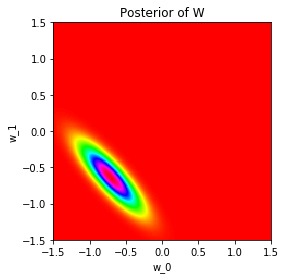

In [21]:
# 2. Picking a single data point (x,t) and visualising the posterior distribution over W.
x_n = X_tot[10]
t_n = T_tot[10]

likelihood_mu = w_1*x_n + w_0
likelihood_std = eps_sigma

for i,(x,y) in enumerate(product(w_0_range,w_1_range)):
    pos = np.hstack((x, y))
    print(x)
    print(y)
    
    #posterior prop to likelihood times prior
    Z[np.unravel_index(i, (N,M))] =  norm(x*x_n + y, likelihood_std).pdf(t_n)*multivariate_normal(prior_mu, prior_cov_mat).pdf(pos)
im = plt.imshow(Z,cmap='hsv',extent=(-1.5, 1.5, -1.5, 1.5))
ax = plt.gca()
ax.grid(False)
plt.title("Posterior of W")
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.show()



In [16]:
product([1,2,3],[1,2,3])
